In [296]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [297]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [298]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [299]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [300]:
pip install plotly


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [301]:
# import necessary modules

import yfinance as Yf
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
# from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import numpy as np

#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots



In [302]:
# Data Pre-processing

from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'All_coins_kaggle.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

print(df)
# Covert data to dataframe
crypto_df = df
crypto_df.head()


       Unnamed: 0          Name                 Date      High       Low  \
0               0  Binance Coin  2017-07-26 23:59:59  0.109013  0.099266   
1               1  Binance Coin  2017-07-27 23:59:59  0.108479  0.100888   
2               2  Binance Coin  2017-07-28 23:59:59  0.109019  0.101473   
3               3  Binance Coin  2017-07-29 23:59:59  0.111264  0.101108   
4               4  Binance Coin  2017-07-30 23:59:59  0.108138  0.103162   
...           ...           ...                  ...       ...       ...   
17417       17417           XRP  2021-07-01 23:59:59  0.704785  0.646796   
17418       17418           XRP  2021-07-02 23:59:59  0.667287  0.634726   
17419       17419           XRP  2021-07-03 23:59:59  0.683677  0.644653   
17420       17420           XRP  2021-07-04 23:59:59  0.707783  0.665802   
17421       17421           XRP  2021-07-05 23:59:59  0.695653  0.648492   

           Open     Close        Volume     Marketcap  
0      0.105893  0.105138  2.00

Unnamed: 0          Name                 Date      High       Low  \
0           0  Binance Coin  2017-07-26 23:59:59  0.109013  0.099266   
1           1  Binance Coin  2017-07-27 23:59:59  0.108479  0.100888   
2           2  Binance Coin  2017-07-28 23:59:59  0.109019  0.101473   
3           3  Binance Coin  2017-07-29 23:59:59  0.111264  0.101108   
4           4  Binance Coin  2017-07-30 23:59:59  0.108138  0.103162   

       Open     Close    Volume   Marketcap  
0  0.105893  0.105138  200395.0  10513800.0  
1  0.105108  0.107737  344499.0  10773700.0  
2  0.107632  0.104067  342568.0  10406700.0  
3  0.104782  0.107811  340218.0  10781100.0  
4  0.107935  0.106414  224261.0  10641400.0

In [303]:
# Check no null value in crypto_df
crypto_df.isna().sum()

Unnamed: 0    0
Name          0
Date          0
High          0
Low           0
Open          0
Close         0
Volume        0
Marketcap     0
dtype: int64

In [304]:
crypto_df.dtypes

Unnamed: 0      int64
Name           object
Date           object
High          float64
Low           float64
Open          float64
Close         float64
Volume        float64
Marketcap     float64
dtype: object

In [305]:
# Data Pre-processing

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df is your DataFrame and 'datetime_column_name' is the name of your datetime column
crypto_df['Date'] = pd.to_datetime(crypto_df['Date'])
crypto_df['Date'] = crypto_df['Date'].astype('int64') // 10**9


# Handle missing values
crypto_df.fillna(method='ffill', inplace=True)

# Creating a new target column (modify this according to your analysis needs)
crypto_df['Target'] = (crypto_df['Close'] > crypto_df['Open']).astype(int)

# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])

# Split the data into features and target
X = scaled_features
y = crypto_df['Target']

# The data is now preprocessed


C:\Users\nency\AppData\Local\Temp\ipykernel_16060\124057422.py:12: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [306]:
# Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif

# Print all column names in the DataFrame
print("Column names in the DataFrame:")
print(crypto_df.columns)

# Replace 'target' with the actual name of your target column
target_column_name = 'close'  # Change this to the actual name of your target column

if target_column_name in df.columns:
    X = crypto_df.drop(target_column_name, axis=1)  # Feature matrix
    y = crypto_df[target_column_name]  # Target variable

    # Rest of your code for feature selection...
else:
    print(f"Column '{target_column_name}' not found in the DataFrame.")

Column names in the DataFrame:
Index(['Unnamed: 0', 'Name', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume',
       'Marketcap', 'Target'],
      dtype='object')
Column 'close' not found in the DataFrame.


In [307]:

#giving name to unnamed column
crypto_df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
crypto_df['Date'] = pd.to_datetime(df['Date'], unit='s')


In [308]:
# Set index for Date
crypto_df = crypto_df.set_index("Date")
crypto_df.head()

id          Name      High       Low      Open     Close  \
Date                                                                            
2017-07-26 23:59:59   0  Binance Coin  0.109013  0.099266  0.105893  0.105138   
2017-07-27 23:59:59   1  Binance Coin  0.108479  0.100888  0.105108  0.107737   
2017-07-28 23:59:59   2  Binance Coin  0.109019  0.101473  0.107632  0.104067   
2017-07-29 23:59:59   3  Binance Coin  0.111264  0.101108  0.104782  0.107811   
2017-07-30 23:59:59   4  Binance Coin  0.108138  0.103162  0.107935  0.106414   

                       Volume   Marketcap  Target  
Date                                               
2017-07-26 23:59:59  200395.0  10513800.0       0  
2017-07-27 23:59:59  344499.0  10773700.0       1  
2017-07-28 23:59:59  342568.0  10406700.0       0  
2017-07-29 23:59:59  340218.0  10781100.0       1  
2017-07-30 23:59:59  224261.0  10641400.0       0

In [309]:
# Creating a new column 'assetid' with default values
crypto_df.insert(loc=len(crypto_df.columns), column='assetid', value=0)

# Generating a mapping from unique names to integers
unique_names = crypto_df['Name'].unique()
name_to_id = {name: idx + 1 for idx, name in enumerate(unique_names)}

# Applying the mapping to the 'Name' column to fill 'assetid'
crypto_df['assetid'] = crypto_df['Name'].map(name_to_id)


In [310]:
crypto_df

id          Name      High       Low      Open  \
Date                                                                     
2017-07-26 23:59:59      0  Binance Coin  0.109013  0.099266  0.105893   
2017-07-27 23:59:59      1  Binance Coin  0.108479  0.100888  0.105108   
2017-07-28 23:59:59      2  Binance Coin  0.109019  0.101473  0.107632   
2017-07-29 23:59:59      3  Binance Coin  0.111264  0.101108  0.104782   
2017-07-30 23:59:59      4  Binance Coin  0.108138  0.103162  0.107935   
...                    ...           ...       ...       ...       ...   
2021-07-01 23:59:59  17417           XRP  0.704785  0.646796  0.704785   
2021-07-02 23:59:59  17418           XRP  0.667287  0.634726  0.659890   
2021-07-03 23:59:59  17419           XRP  0.683677  0.644653  0.655639   
2021-07-04 23:59:59  17420           XRP  0.707783  0.665802  0.673218   
2021-07-05 23:59:59  17421           XRP  0.695653  0.648492  0.695653   

                        Close        Volume     Marketcap  Target  assetid  
Date                                                                        
2017-07-26 23:59:59  0.105138  2.003950e+05  1.051380e+07       0        1  
2017-07-27 23:59:59  0.107737  3.444990e+05  1.077370e+07       1        1  
2017-07-28 23:59:59  0.104067  3.425680e+05  1.040670e+07       0        1  
2017-07-29 23:59:59  0.107811  3.402180e+05  1.078110e+07       1        1  
2017-07-30 23:59:59  0.106414  2.242610e+05  1.064140e+07       0        1  
...                       ...           ...           ...     ...      ...  
2021-07-01 23:59:59  0.661180  2.553971e+09  3.051144e+10       0       10  
2021-07-02 23:59:59  0.656763  2.061607e+09  3.030759e+10       0       10  
2021-07-03 23:59:59  0.672888  1.872820e+09  3.105172e+10       1       10  
2021-07-04 23:59:59  0.694945  1.885242e+09  3.206960e+10       1       10  
2021-07-05 23:59:59  0.654300  2.076373e+09  3.019395e+10       0       10  

[17422 rows x 10 columns]

In [311]:
import pandas as pd

# Assuming 'df' is your DataFrame with the dataset
# Convert 'Date' column to datetime
crypto_df['Date'] = pd.to_datetime(crypto_df['Date'])

# Calculate daily return for each currency
crypto_df['Daily Return'] = crypto_df.groupby('Name')['Close'].pct_change()

# Latest date in the dataset for the most recent trend
latest_date = crypto_df['Date'].max()

# Filter data for the latest date to find the trend of top 10 currencies by market cap
latest_trends = crypto_df[crypto_df['Date'] == latest_date].sort_values(by='Marketcap', ascending=False).head(10)

# Display the names of top 10 currencies and their latest daily return to indicate the trend
print(latest_trends[['Name', 'Daily Return']])


KeyError: 'Date'

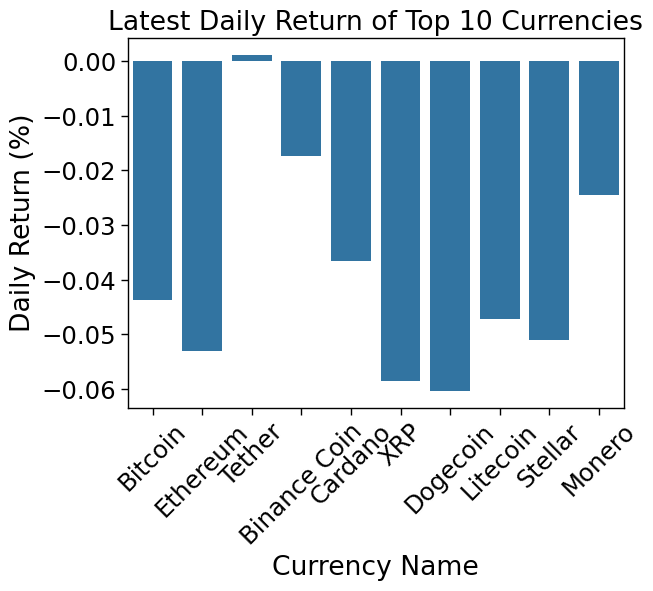

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'latest_trends' contains the top 10 currencies data as previously filtered
sns.barplot(data=latest_trends, x='Name', y='Daily Return')
plt.xticks(rotation=45)
plt.title('Latest Daily Return of Top 10 Currencies')
plt.ylabel('Daily Return (%)')
plt.xlabel('Currency Name')
plt.show()


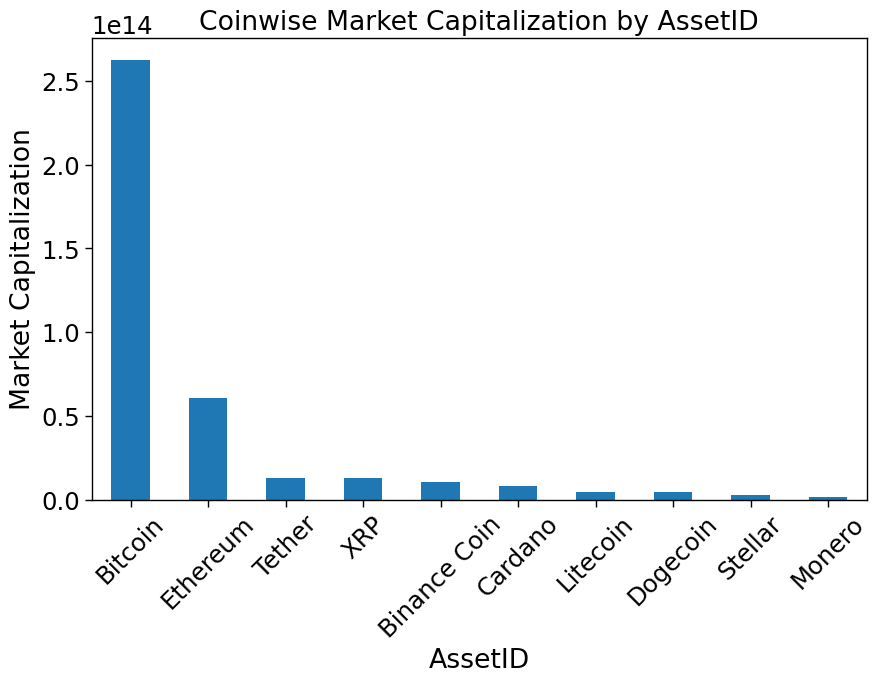

In [ ]:
# Group by 'AssetID' instead of 'Name' for unique identification and sum 'Marketcap'
coinwise_marketcap = crypto_df.groupby('Name')['Marketcap'].sum().sort_values(ascending=False)

# Plot
coinwise_marketcap.plot(kind='bar', figsize=(10, 6))
plt.title('Coinwise Market Capitalization by AssetID')
plt.ylabel('Market Capitalization')
plt.xlabel('AssetID')
plt.xticks(rotation=45)
plt.show()


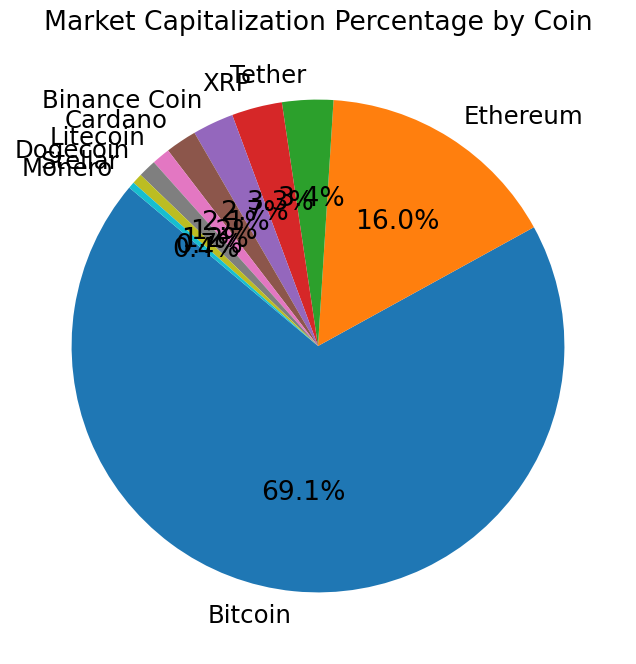

In [ ]:
# Group by 'AssetID' instead of 'Name' for unique identification and sum 'Marketcap'
coinwise_marketcap = crypto_df.groupby('Name')['Marketcap'].sum().sort_values(ascending=False)
# Calculate market cap percentage
market_cap_percentage = (coinwise_marketcap / coinwise_marketcap.sum()) * 100
# Assuming 'market_cap_percentage' contains the calculated percentages as previously defined
market_cap_percentage.plot(kind='pie', labels=market_cap_percentage.index,figsize=(10, 8), autopct='%1.1f%%', startangle=140)
plt.title('Market Capitalization Percentage by Coin')
plt.ylabel('')  # Remove the y-label as it's unnecessary for a pie chart
plt.show()



In [ ]:
cryptodata=crypto_df

In [ ]:
# First, ensure the index is sorted
crypto_df.sort_index(inplace=True)

# Then, perform the slicing. If the exact dates might not exist, consider using the closest valid dates within the range
start_date = '2019-07-06'
end_date = '2021-07-06'

# Adjusting start and end dates if they're outside the index's bounds
if start_date < str(crypto_df.index.min()):
    start_date = str(crypto_df.index.min())

if end_date > str(crypto_df.index.max()):
    end_date = str(crypto_df.index.max())

crypto_df = crypto_df.loc[start_date:end_date].reset_index()


In [ ]:
crypto_df

Date     id          Name          High           Low  \
0    2019-07-06 23:59:59  14865        Tether      1.009563      0.994577   
1    2019-07-06 23:59:59   5735      Dogecoin      0.003968      0.003470   
2    2019-07-06 23:59:59  11213        Monero     98.973083     89.133718   
3    2019-07-06 23:59:59    710  Binance Coin     33.319241     32.479437   
4    2019-07-06 23:59:59   7561      Ethereum    295.991415    286.665872   
...                  ...    ...           ...           ...           ...   
7305 2021-07-05 23:59:59   8291      Ethereum   2321.922836   2163.041394   
7306 2021-07-05 23:59:59   6465      Dogecoin      0.246419      0.227838   
7307 2021-07-05 23:59:59   3266       Bitcoin  35284.344430  33213.661034   
7308 2021-07-05 23:59:59   1440  Binance Coin    307.684855    293.523465   
7309 2021-07-05 23:59:59  17421           XRP      0.695653      0.648492   

              Open         Close        Volume     Marketcap  Target  assetid  
0         1.001392      0.997410  2.081464e+10  3.688690e+09       0        9  
1         0.003872      0.003547  6.503178e+07  4.264218e+08       0        4  
2        89.141267     93.939510  1.907449e+08  1.604838e+09       1        7  
3        32.711335     32.530940  1.872474e+08  4.592571e+09       0        1  
4       287.893815    287.547126  7.674615e+09  3.070779e+10       0        5  
...            ...           ...           ...           ...     ...      ...  
7305   2321.922836   2198.582464  2.010379e+10  2.562978e+11       0        5  
7306      0.246419      0.231614  1.267949e+09  3.018344e+10       0        4  
7307  35284.344430  33746.002456  2.672155e+10  6.326962e+11       0        2  
7308    307.684855    302.377980  1.504870e+09  4.639473e+10       0        1  
7309      0.695653      0.654300  2.076373e+09  3.019395e+10       0       10  

[7310 rows x 11 columns]

In [ ]:
# For Binance Coin
bnb = crypto_df[crypto_df["assetid"]==1] 
bnb.head()

Date   id          Name       High        Low       Open  \
3  2019-07-06 23:59:59  710  Binance Coin  33.319241  32.479437  32.711335   
13 2019-07-07 23:59:59  711  Binance Coin  33.492957  32.450660  32.521632   
22 2019-07-08 23:59:59  712  Binance Coin  34.250313  33.097659  33.263501   
35 2019-07-09 23:59:59  713  Binance Coin  33.951302  32.533198  33.471279   
40 2019-07-10 23:59:59  714  Binance Coin  32.974997  30.956919  32.703180   

        Close        Volume     Marketcap  Target  assetid  
3   32.530940  1.872474e+08  4.592571e+09       0        1  
13  33.241061  1.988594e+08  4.692823e+09       1        1  
22  33.469681  2.576988e+08  4.725099e+09       1        1  
35  32.707650  2.109044e+08  4.617518e+09       0        1  
40  31.477377  2.705117e+08  4.443834e+09       0        1

In [ ]:
# For Bitcoin
btc = crypto_df[crypto_df["assetid"]==2] 
btc.head()

Date    id     Name          High           Low  \
9  2019-07-06 23:59:59  2536  Bitcoin  11620.965153  10982.543914   
18 2019-07-07 23:59:59  2537  Bitcoin  11541.619873  11148.804813   
21 2019-07-08 23:59:59  2538  Bitcoin  12345.833146  11393.374313   
37 2019-07-09 23:59:59  2539  Bitcoin  12779.132097  12233.262031   
42 2019-07-10 23:59:59  2540  Bitcoin  13129.528934  11710.978415   

            Open         Close        Volume     Marketcap  Target  assetid  
9   10982.543914  11208.550845  2.109202e+10  1.995461e+11       1        2  
18  11217.615934  11450.846755  1.936904e+10  2.038819e+11       1        2  
21  11446.597155  12285.958217  2.348255e+10  2.187784e+11       1        2  
37  12284.326465  12573.812941  2.816792e+10  2.239281e+11       1        2  
42  12571.537162  12156.512631  3.362757e+10  2.165160e+11       0        2

In [ ]:
# For Cardano
cda = crypto_df[crypto_df["assetid"]==3] 
cda.head()

Date    id     Name      High       Low      Open     Close  \
5  2019-07-06 23:59:59  3909  Cardano  0.080290  0.076289  0.076518  0.077335   
12 2019-07-07 23:59:59  3910  Cardano  0.080261  0.076982  0.077346  0.079964   
26 2019-07-08 23:59:59  3911  Cardano  0.082259  0.079004  0.079932  0.080476   
33 2019-07-09 23:59:59  3912  Cardano  0.080821  0.077354  0.080452  0.077993   
45 2019-07-10 23:59:59  3913  Cardano  0.078322  0.069825  0.078012  0.071940   

          Volume     Marketcap  Target  assetid  
5   1.289617e+08  2.005081e+09       1        3  
12  1.049846e+08  2.073227e+09       1        3  
26  1.143395e+08  2.086511e+09       1        3  
33  1.229354e+08  2.022136e+09       0        3  
45  1.199997e+08  1.865187e+09       0        3

In [ ]:
# For Dogecoin Coin
doge = crypto_df[crypto_df["assetid"]==4] 
doge.head()

Date    id      Name      High       Low      Open  \
1  2019-07-06 23:59:59  5735  Dogecoin  0.003968  0.003470  0.003872   
17 2019-07-07 23:59:59  5736  Dogecoin  0.003658  0.003495  0.003553   
28 2019-07-08 23:59:59  5737  Dogecoin  0.003644  0.003513  0.003635   
30 2019-07-09 23:59:59  5738  Dogecoin  0.003615  0.003459  0.003556   
46 2019-07-10 23:59:59  5739  Dogecoin  0.003600  0.003364  0.003551   

       Close        Volume     Marketcap  Target  assetid  
1   0.003547  6.503178e+07  4.264218e+08       0        4  
17  0.003633  4.437965e+07  4.368922e+08       1        4  
28  0.003559  4.168271e+07  4.279754e+08       0        4  
30  0.003549  4.261383e+07  4.268614e+08       0        4  
46  0.003424  4.907858e+07  4.118467e+08       0        4

In [ ]:
# For Ethereum Coin
eth = crypto_df[crypto_df["assetid"]==5] 
eth.head()

Date    id      Name        High         Low        Open  \
4  2019-07-06 23:59:59  7561  Ethereum  295.991415  286.665872  287.893815   
16 2019-07-07 23:59:59  7562  Ethereum  310.139320  286.109200  287.603612   
20 2019-07-08 23:59:59  7563  Ethereum  314.267880  303.500454  305.734786   
36 2019-07-09 23:59:59  7564  Ethereum  318.223116  305.285814  313.325174   
47 2019-07-10 23:59:59  7565  Ethereum  313.069445  285.565783  308.851274   

         Close        Volume     Marketcap  Target  assetid  
4   287.547126  7.674615e+09  3.070779e+10       0        5  
16  305.700560  8.119725e+09  3.265061e+10       1        5  
20  313.251404  9.078906e+09  3.346137e+10       1        5  
36  308.881017  1.005516e+10  3.299875e+10       0        5  
47  290.002318  1.167999e+10  3.098583e+10       0        5

In [ ]:
# For Litecoin Coin
ltc = crypto_df[crypto_df["assetid"]==6] 
ltc.head()

Date    id      Name        High         Low        Open  \
8  2019-07-06 23:59:59  9387  Litecoin  121.294059  117.327119  118.378719   
15 2019-07-07 23:59:59  9388  Litecoin  120.325262  117.641090  118.026007   
29 2019-07-08 23:59:59  9389  Litecoin  125.082014  118.598566  120.283494   
39 2019-07-09 23:59:59  9390  Litecoin  124.165418  118.228096  123.247104   
49 2019-07-10 23:59:59  9391  Litecoin  120.104316  103.822187  119.500997   

         Close        Volume     Marketcap  Target  assetid  
8   117.823620  3.484378e+09  7.369731e+09       0        6  
15  120.320878  3.348662e+09  7.527688e+09       1        6  
29  123.285485  3.803750e+09  7.714782e+09       1        6  
39  119.432812  3.785641e+09  7.475394e+09       0        6  
49  108.500258  4.699512e+09  6.792744e+09       0        6

In [ ]:
# For Monero Coin
mnr = crypto_df[crypto_df["assetid"]==7] 
mnr.head()

Date     id    Name        High         Low        Open  \
2  2019-07-06 23:59:59  11213  Monero   98.973083   89.133718   89.141267   
11 2019-07-07 23:59:59  11214  Monero  107.183223   93.171777   93.987344   
27 2019-07-08 23:59:59  11215  Monero  107.318136  100.808772  107.095709   
31 2019-07-09 23:59:59  11216  Monero  104.544312   98.013804  101.597207   
43 2019-07-10 23:59:59  11217  Monero  101.600619   92.546622   99.450257   

         Close        Volume     Marketcap  Target  assetid  
2    93.939510  1.907449e+08  1.604838e+09       1        7  
11  107.183223  1.827199e+08  1.831299e+09       1        7  
27  101.586491  1.558289e+08  1.735766e+09       0        7  
31   99.418083  1.246283e+08  1.698715e+09       0        7  
43   94.937034  1.421325e+08  1.622149e+09       0        7

In [ ]:
# For Stellar Coin
tlr = crypto_df[crypto_df["assetid"]==8] 
tlr.head()

Date     id     Name      High       Low      Open  \
7  2019-07-06 23:59:59  13039  Stellar  0.104214  0.099892  0.099892   
19 2019-07-07 23:59:59  13040  Stellar  0.105794  0.102183  0.102927   
25 2019-07-08 23:59:59  13041  Stellar  0.106230  0.103909  0.104994   
38 2019-07-09 23:59:59  13042  Stellar  0.105964  0.101105  0.105082   
44 2019-07-10 23:59:59  13043  Stellar  0.102489  0.093288  0.101836   

       Close        Volume     Marketcap  Target  assetid  
7   0.102875  2.553865e+08  1.998355e+09       1        8  
19  0.105054  2.356726e+08  2.040677e+09       1        8  
25  0.105023  2.654927e+08  2.040086e+09       1        8  
38  0.101834  3.825653e+08  1.978200e+09       0        8  
44  0.095057  4.237442e+08  1.846557e+09       0        8

In [ ]:
# For Tether Coin
thr = crypto_df[crypto_df["assetid"]==9] 
thr.head()

Date     id    Name      High       Low      Open     Close  \
0  2019-07-06 23:59:59  14865  Tether  1.009563  0.994577  1.001392  0.997410   
10 2019-07-07 23:59:59  14866  Tether  1.008509  0.994346  0.997018  1.002450   
24 2019-07-08 23:59:59  14867  Tether  1.009988  0.995300  1.002688  1.004626   
32 2019-07-09 23:59:59  14868  Tether  1.018833  1.000392  1.004736  1.002220   
48 2019-07-10 23:59:59  14869  Tether  1.014175  0.995900  1.001773  0.999782   

          Volume     Marketcap  Target  assetid  
0   2.081464e+10  3.688690e+09       0        9  
10  1.984039e+10  3.710332e+09       1        9  
24  2.282095e+10  3.778152e+09       1        9  
32  2.693381e+10  3.847192e+09       0        9  
48  3.390784e+10  3.844539e+09       0        9

In [ ]:
# For XRP Coin
xrp = crypto_df[crypto_df["assetid"]==10] 
xrp.head()

Date     id Name      High       Low      Open     Close  \
6  2019-07-06 23:59:59  16691  XRP  0.408374  0.378463  0.379139  0.389055   
14 2019-07-07 23:59:59  16692  XRP  0.398887  0.387624  0.389503  0.397047   
23 2019-07-08 23:59:59  16693  XRP  0.402690  0.392328  0.397261  0.401533   
34 2019-07-09 23:59:59  16694  XRP  0.406549  0.391286  0.401645  0.394168   
41 2019-07-10 23:59:59  16695  XRP  0.397920  0.352078  0.394857  0.363775   

          Volume     Marketcap  Target  assetid  
6   1.521410e+09  1.656075e+10       1       10  
14  1.210814e+09  1.690095e+10       1       10  
23  1.253488e+09  1.709188e+10       1       10  
34  1.413299e+09  1.677839e+10       0       10  
41  2.300686e+09  1.548466e+10       0       10

In [ ]:
def to2018(df):
    df18=equalize(df,bit)
    return df18.iloc[:len(bit18)]

def equalize(df,dfs):
    low=len(dfs)
    high=len(df)
    dff=high-low
    
    return df.iloc[dff:]

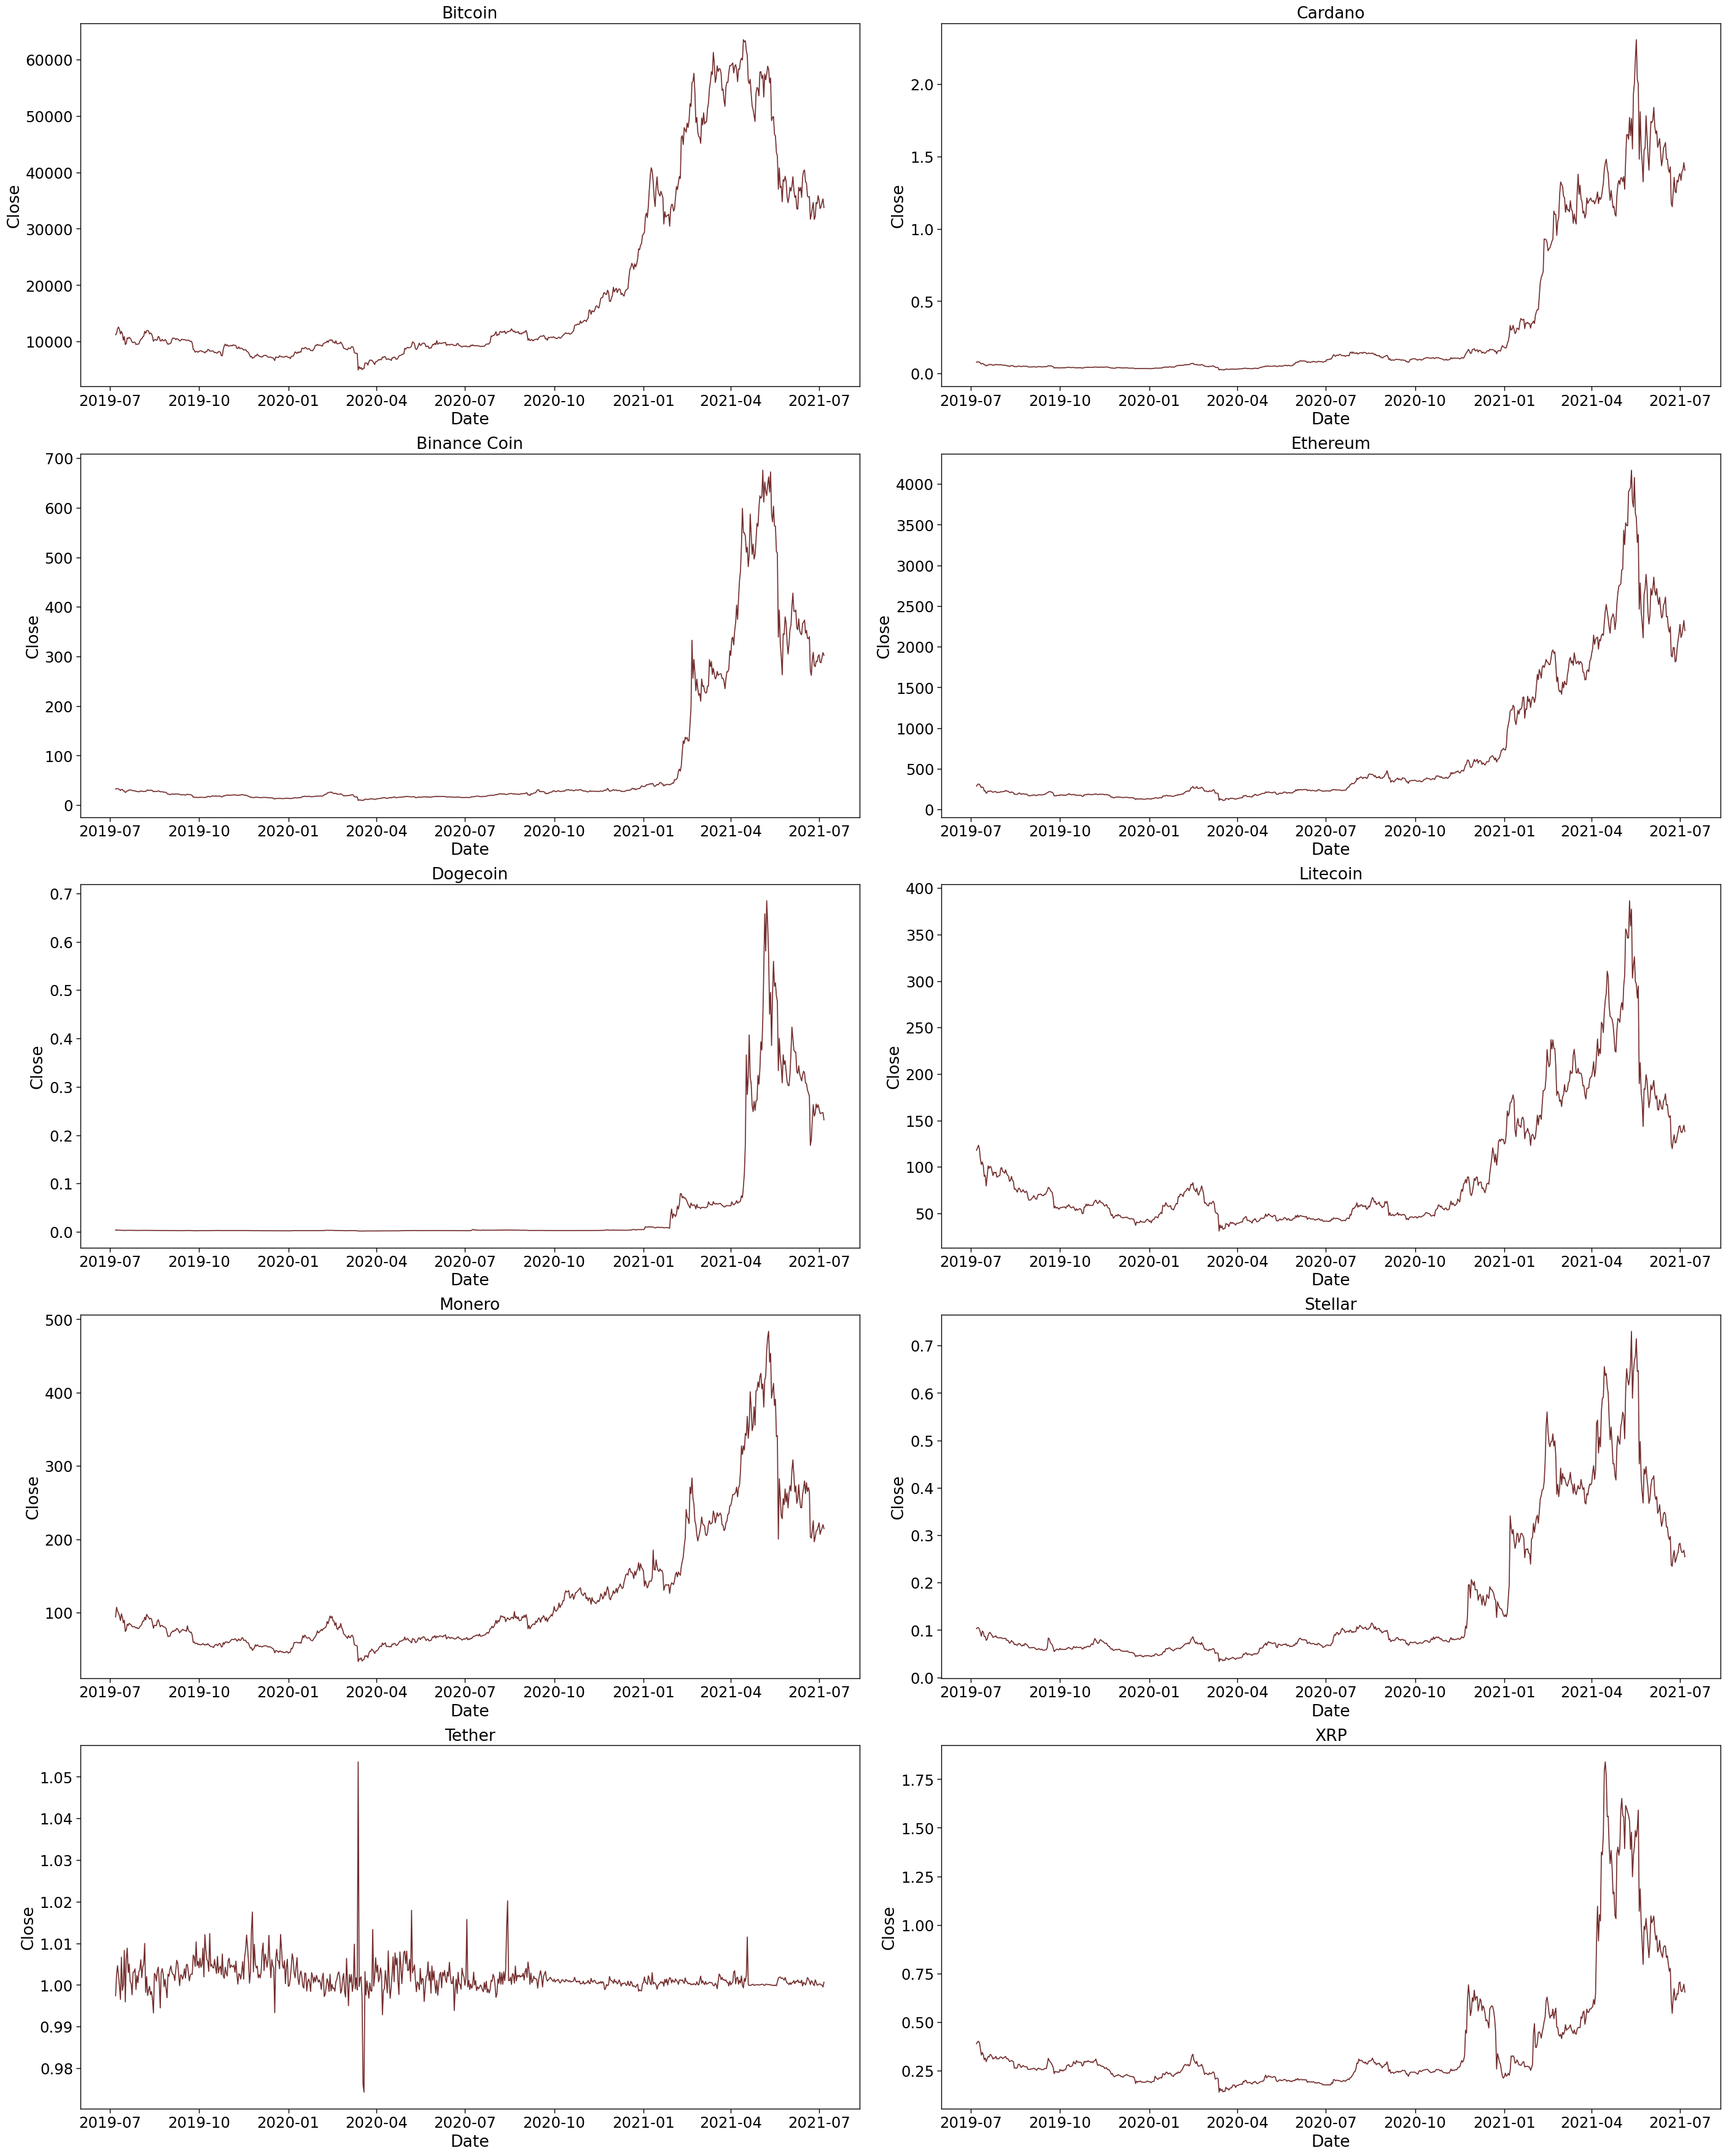

In [ ]:
# Lineplot for each coin
crypto=["Bitcoin","Cardano","Binance Coin","Ethereum","Dogecoin","Litecoin","Monero","Stellar","Tether","XRP"]
cryptoDf=[btc,cda,bnb,eth,doge,ltc,mnr,tlr,thr,xrp]
num_plots = 10
total_cols = 2
total_rows = 5
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(14*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(crypto):
    row = i//total_cols
    pos = i % total_cols
    sns.set_context('paper', font_scale = 2)
    plot = sns.lineplot(data=cryptoDf[i], x="Date", y="Close", color='#732C2C', ax=axs[row][pos])

    # plot =  sns.lineplot(data=cryptoDf[i], x="Date", y="Close",color='#732C2C',palette ='coolwarm',ax=axs[row][pos])
    axs[row][pos].set_title(crypto[i])

C:\Users\nency\AppData\Local\Temp\ipykernel_16060\2932218692.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nency\AppData\Local\Temp\ipykernel_16060\2932218692.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nency\AppData\Local\Temp\ipykernel_16060\2932218692.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

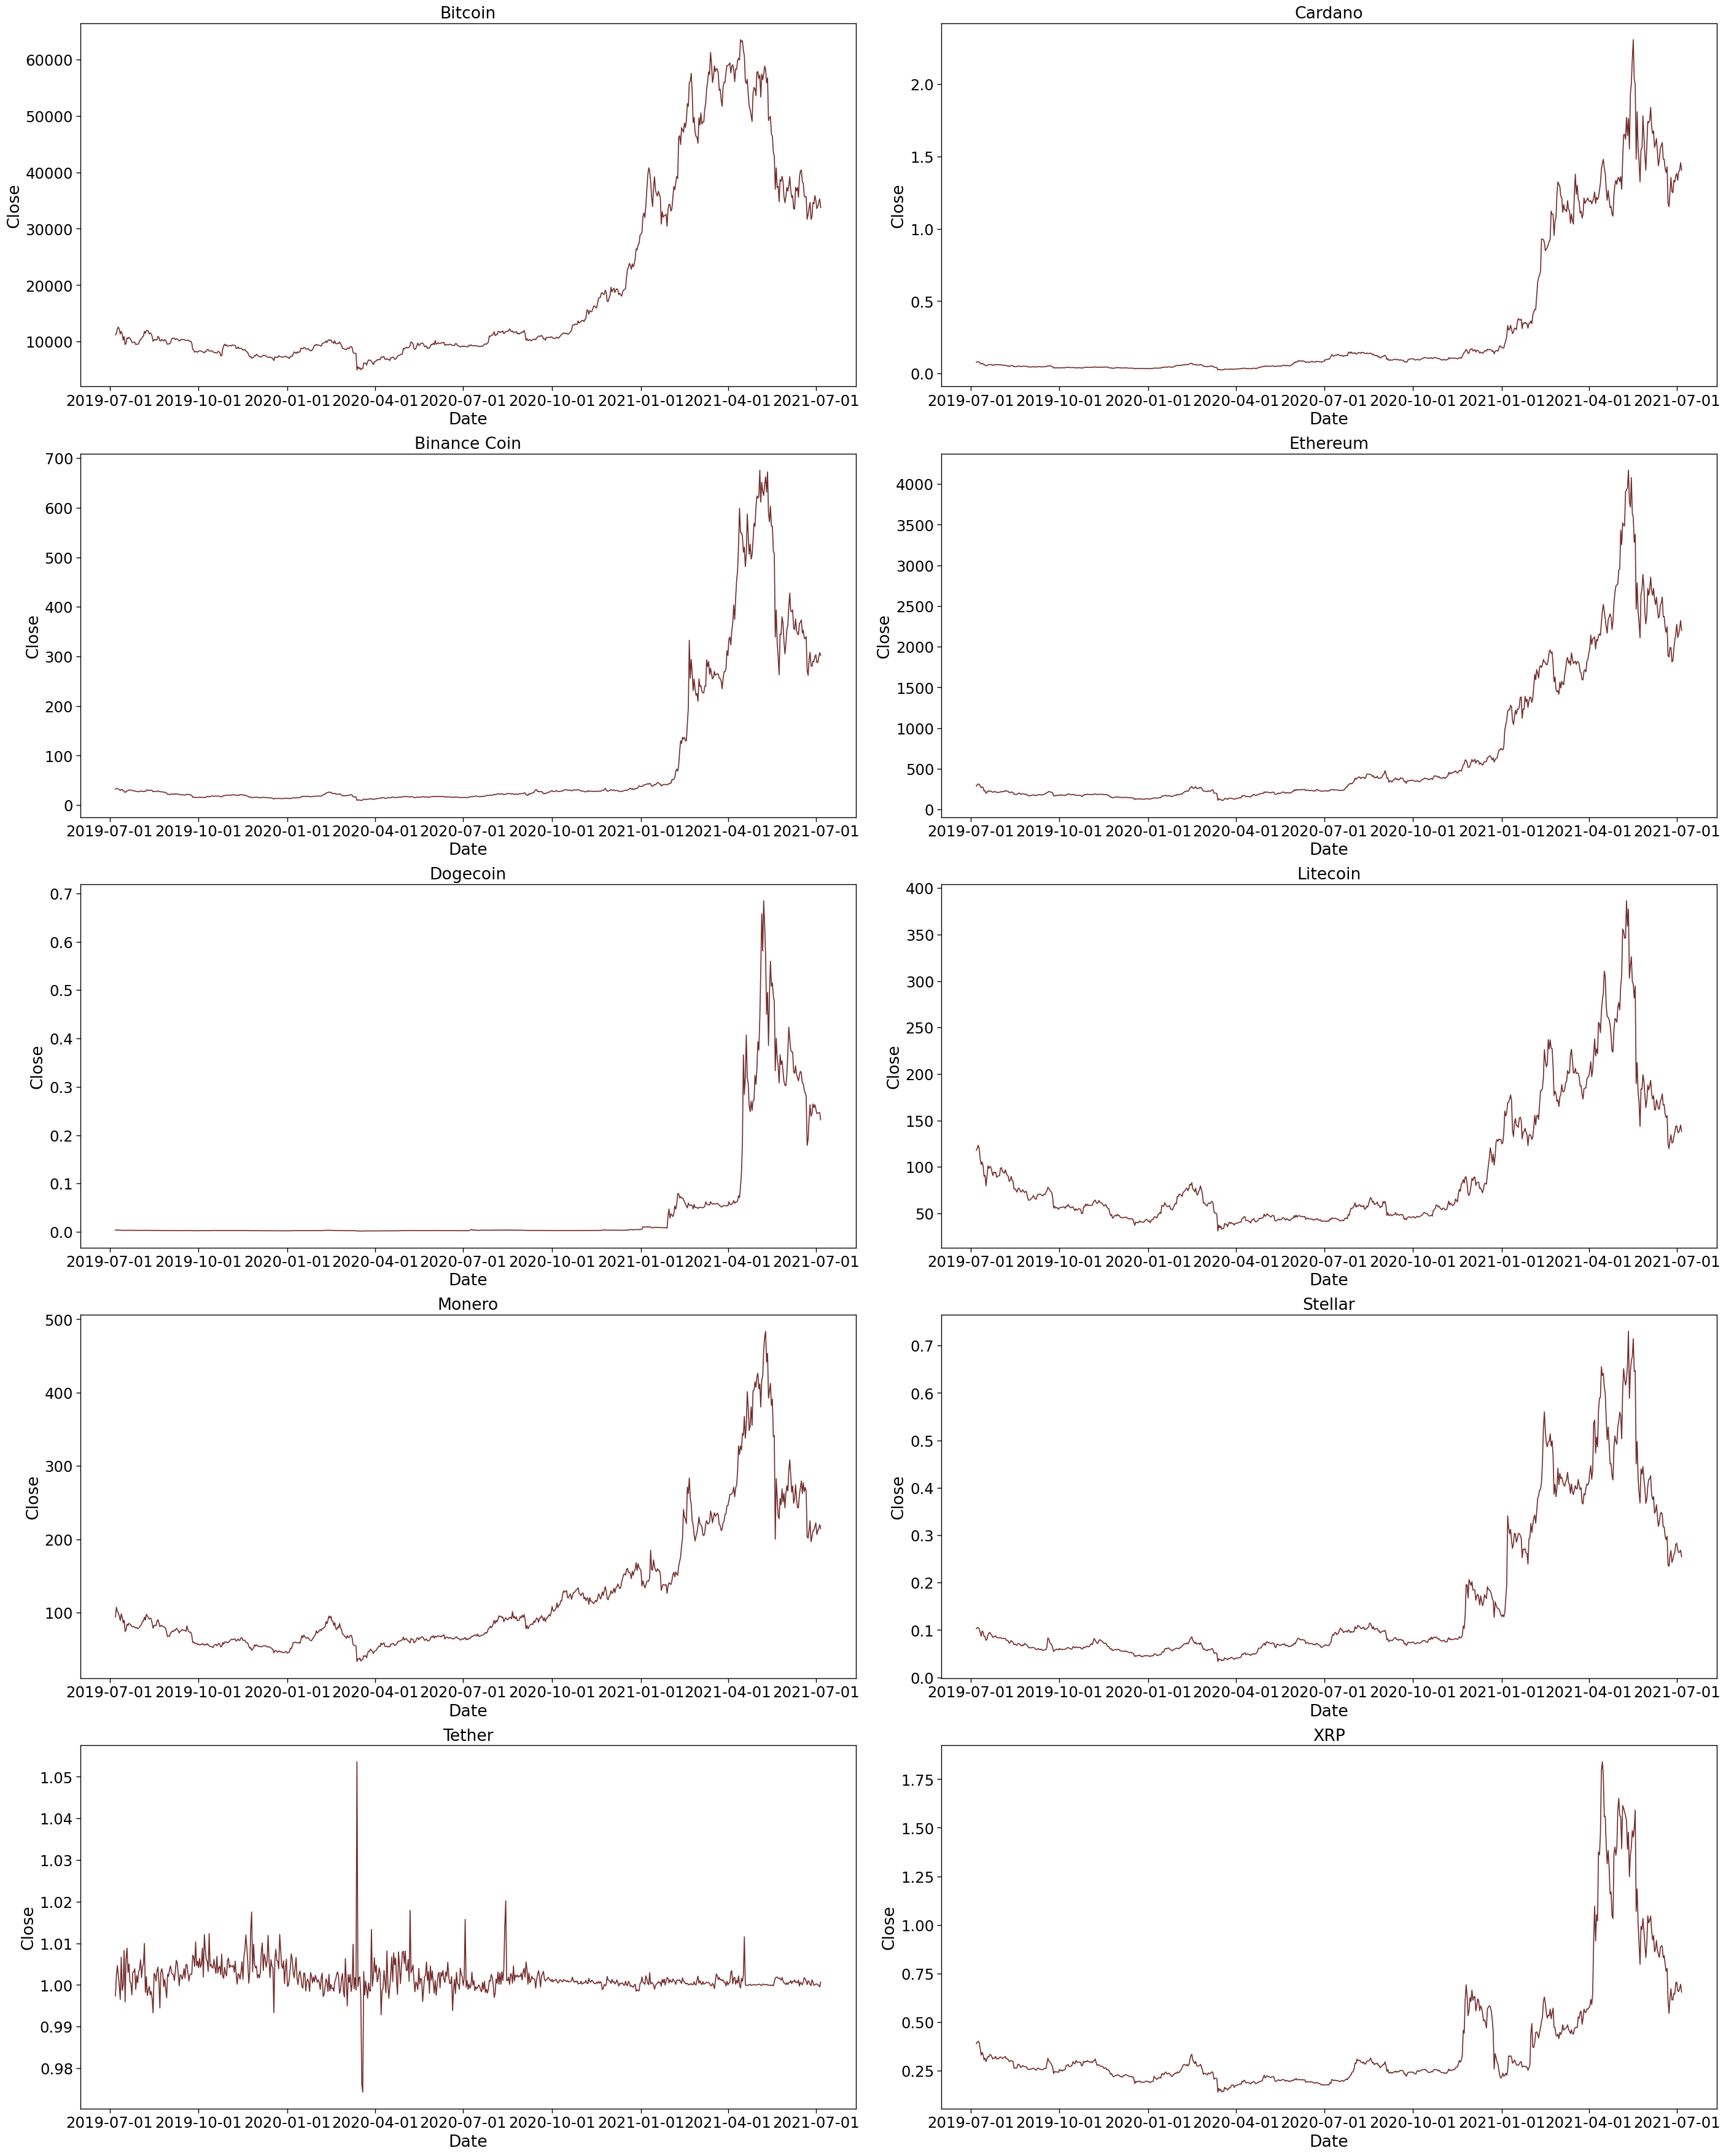

In [ ]:
import matplotlib.dates as mdates

# Ensure the 'Date' column in each DataFrame is of datetime type
cryptoDf = [btc, cda, bnb, eth, doge, ltc, mnr, tlr, thr, xrp]
for df in cryptoDf:
    df['Date'] = pd.to_datetime(df['Date'])

fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(14*total_cols, 7*total_rows), constrained_layout=True)

for i, var in enumerate(crypto):
    row = i // total_cols
    pos = i % total_cols
    sns.set_context('paper', font_scale=2)
    sns.lineplot(data=cryptoDf[i], x="Date", y="Close", color='#732C2C', ax=axs[row][pos])
    axs[row][pos].set_title(crypto[i])
    axs[row][pos].xaxis.set_major_locator(mdates.AutoDateLocator())
    axs[row][pos].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))




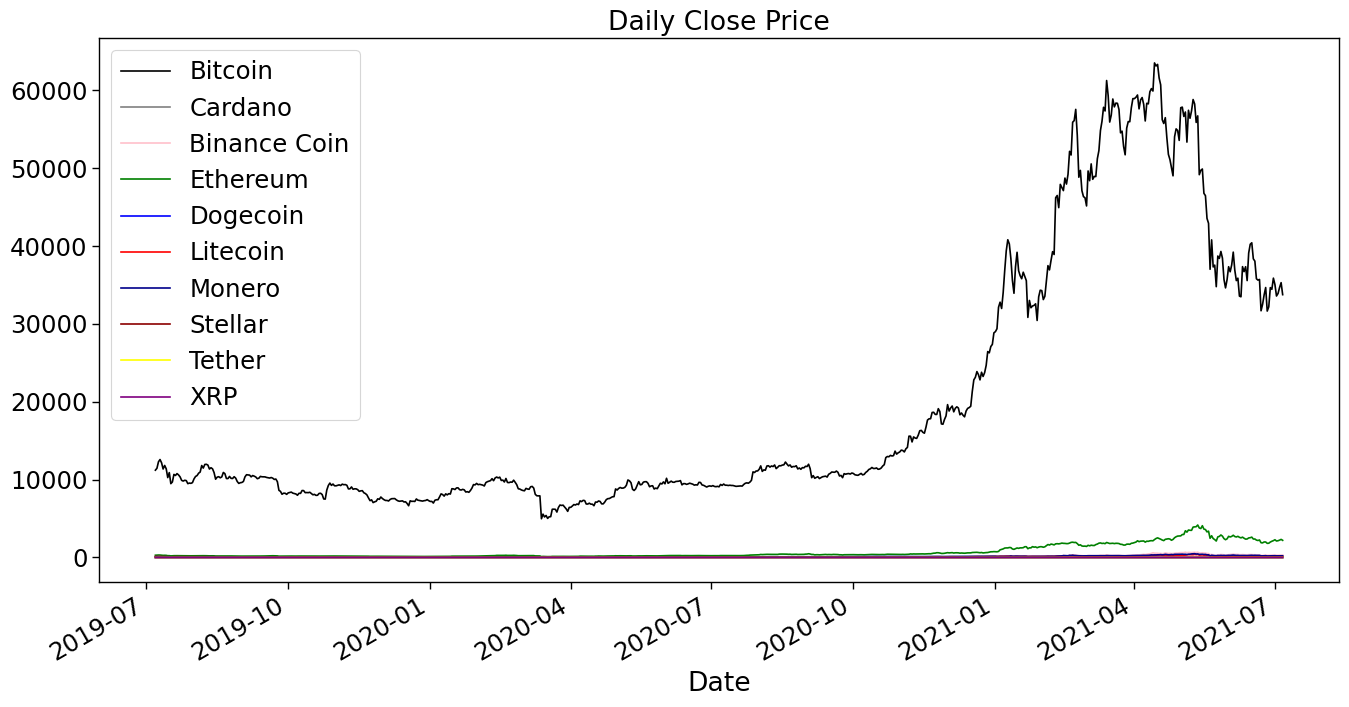

In [ ]:
# Adjust plot to display dates better
plt.figure(figsize=(16,8))
for df, label, color in zip(cryptoDf, crypto, ["black", "gray", "pink", "green", "blue", "red", "darkblue", "darkred", "yellow", "purple"]):
    plt.plot(df['Date'], df['Close'], label=label, color=color)

plt.title("Daily Close Price")
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate() # Auto format to prevent overlap

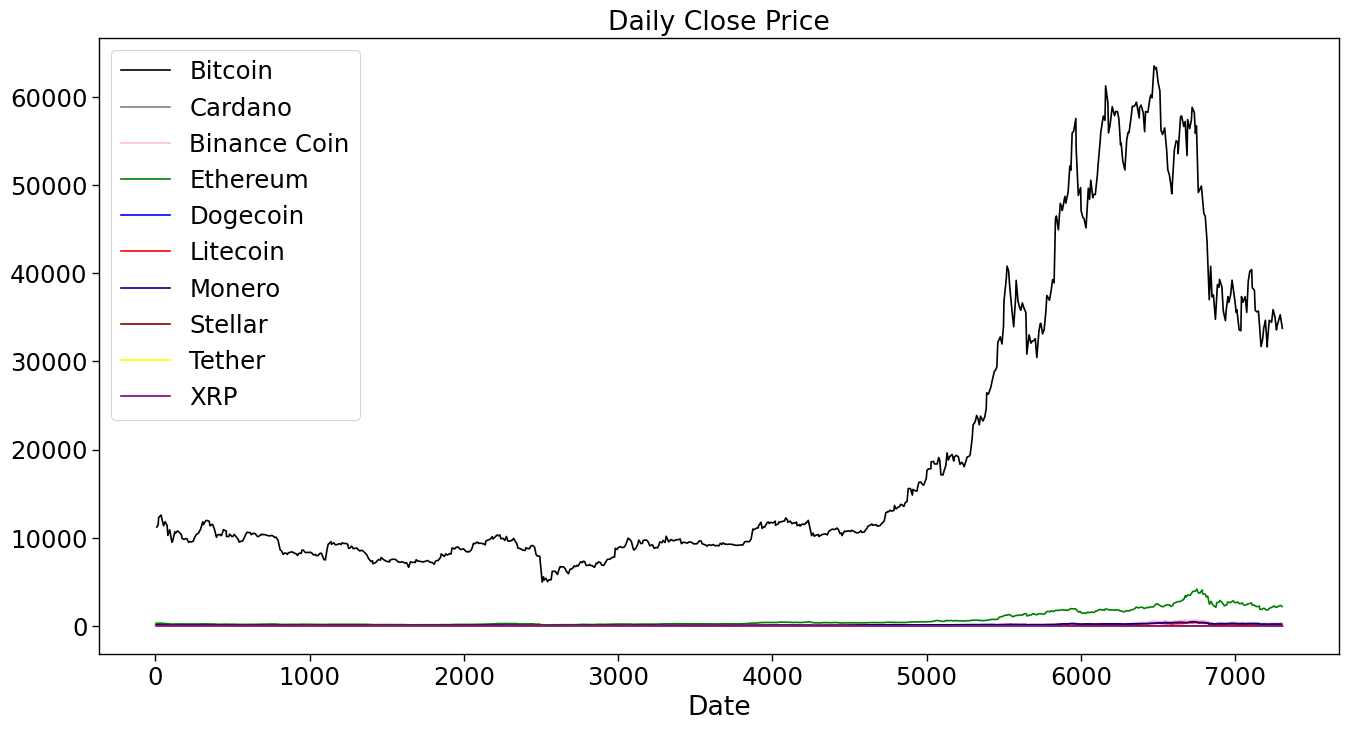

In [ ]:
# Combine daily close price of all coins in one chart
plt.figure(figsize=(16,8))
btc['Close'].plot(label='Bitcoin', color="black")
cda['Close'].plot(label='Cardano', color="gray")
bnb['Close'].plot(label='Binance Coin', color="pink")
eth['Close'].plot(label='Ethereum', color="green")
doge['Close'].plot(label='Dogecoin', color="blue")
ltc['Close'].plot(label='Litecoin', color="red")
mnr['Close'].plot(label='Monero', color="darkblue")
tlr['Close'].plot(label='Stellar', color="darkred")
thr['Close'].plot(label='Tether', color="yellow")
xrp['Close'].plot(label='XRP', color="purple")

plt.title("Daily Close Price")
plt.xlabel('Date')
plt.legend()

C:\Users\nency\AppData\Local\Temp\ipykernel_16060\1007418141.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nency\AppData\Local\Temp\ipykernel_16060\1007418141.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



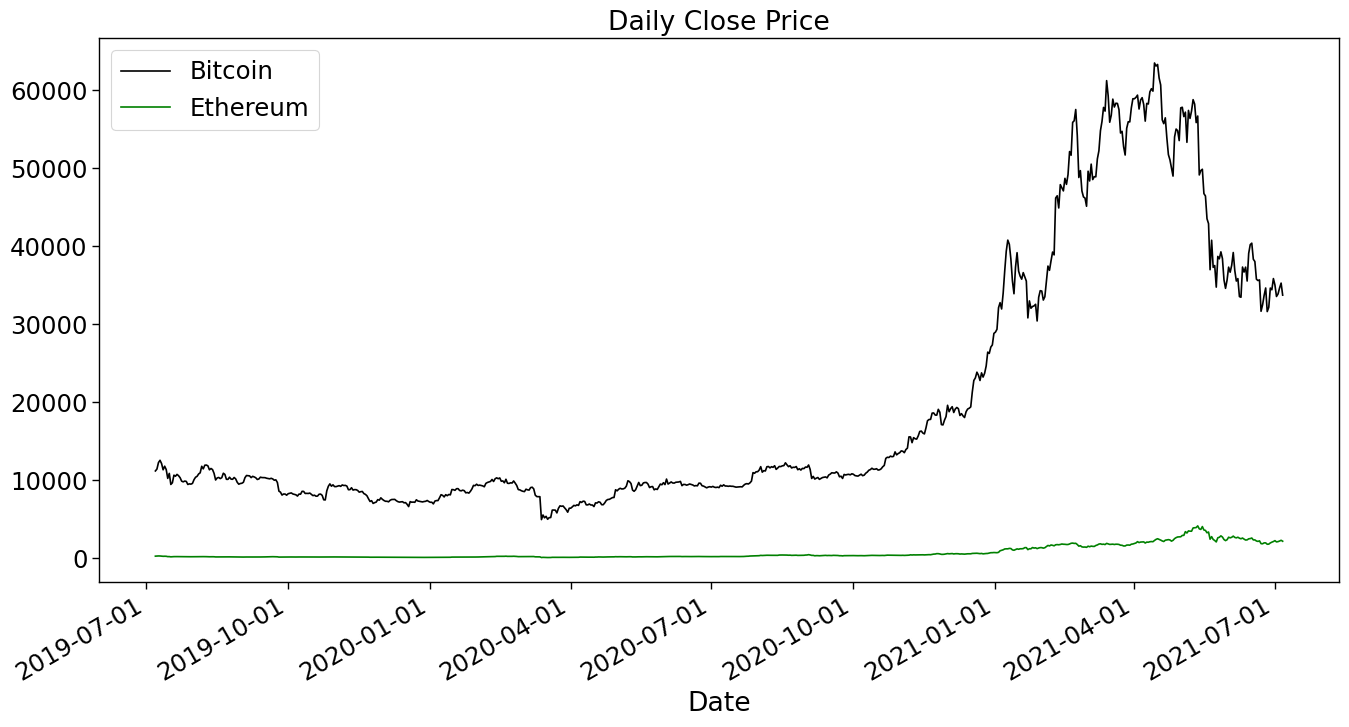

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(16,8))

# Ensure the 'Date' column is a datetime type and set as index for proper plotting
btc['Date'] = pd.to_datetime(btc['Date'])
btc.set_index('Date')['Close'].plot(label='Bitcoin', color="black")

eth['Date'] = pd.to_datetime(eth['Date'])
eth.set_index('Date')['Close'].plot(label='Ethereum', color="green")

plt.title("Daily Close Price")
plt.xlabel('Date')
plt.legend()

# Format the x-axis to display dates properly
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() # Auto format to prevent overlap


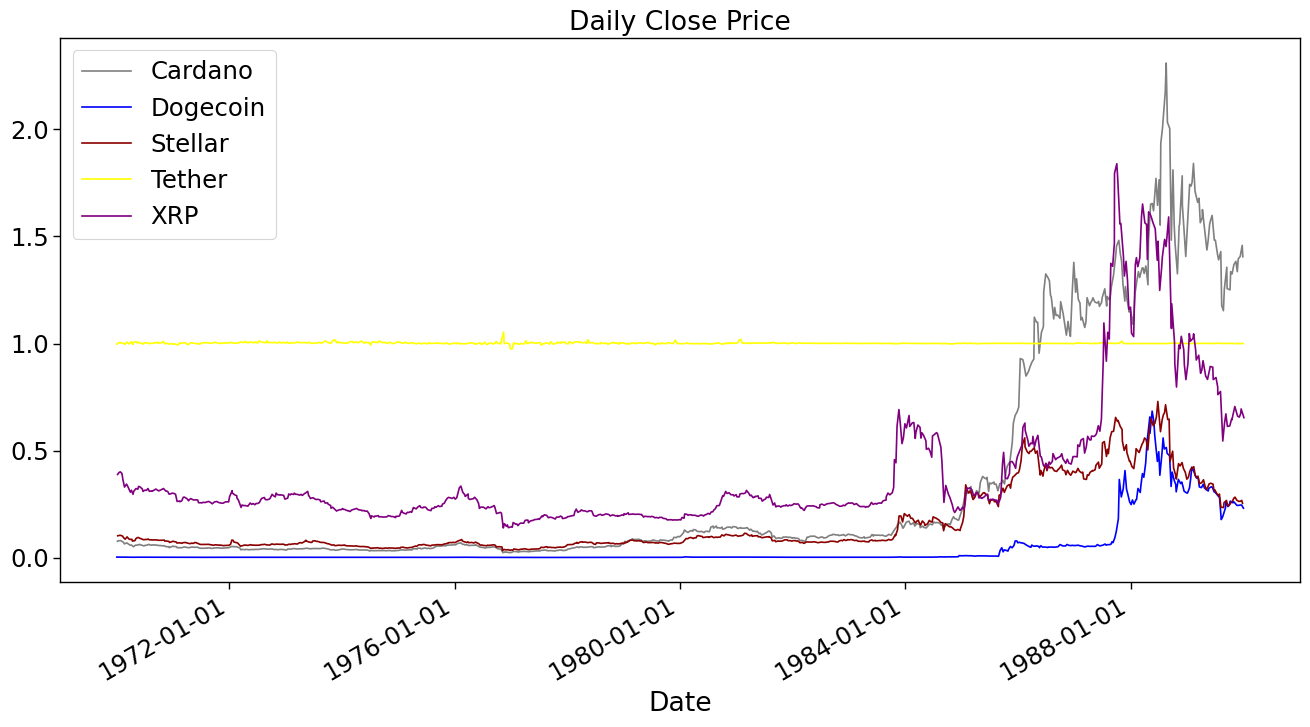

In [ ]:
plt.figure(figsize=(16,8))

# Assuming 'Date' is already set as index or these DataFrames don't need date conversion as per previous context
cda['Close'].plot(label='Cardano', color="gray")
doge['Close'].plot(label='Dogecoin', color="blue")
tlr['Close'].plot(label='Stellar', color="darkred")
thr['Close'].plot(label='Tether', color="yellow")
xrp['Close'].plot(label='XRP', color="purple")

plt.title("Daily Close Price")
plt.xlabel('Date')
plt.legend()

# Adjusting date formatting for better readability
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate() # Auto format to prevent overlap


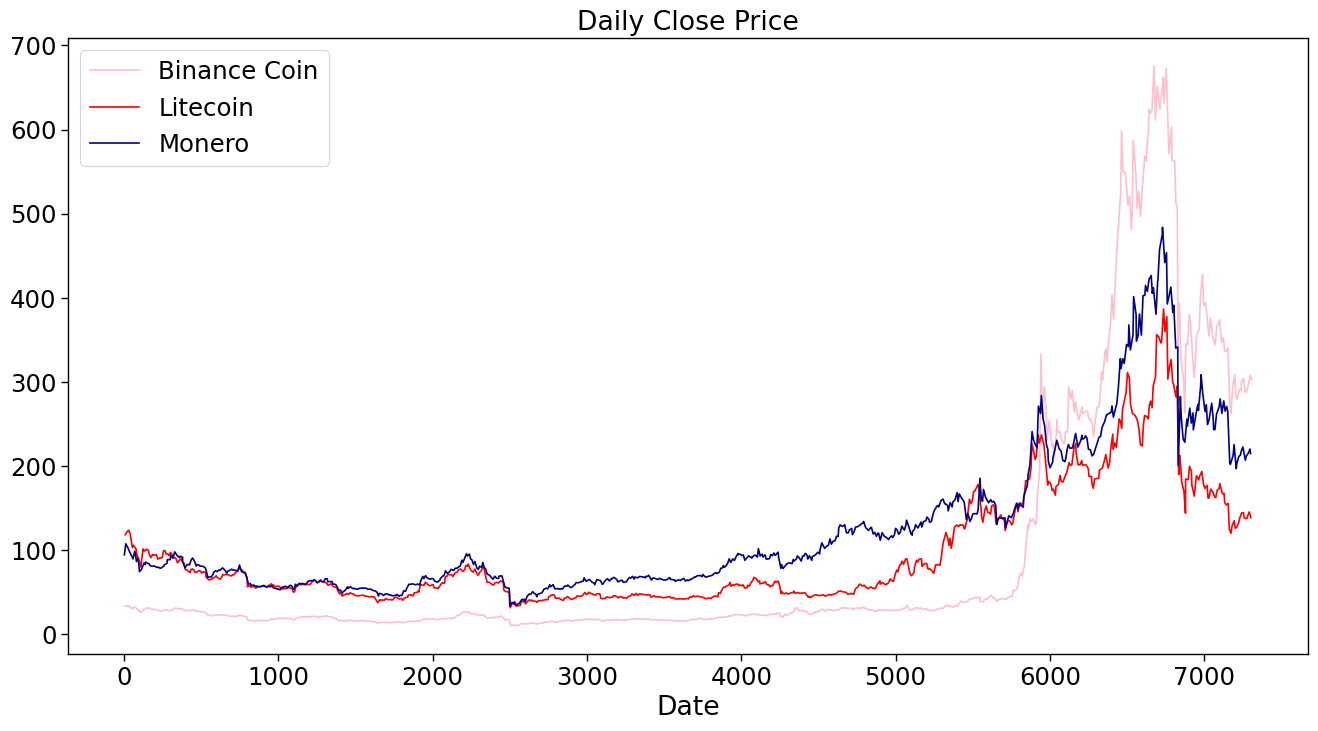

In [ ]:
plt.figure(figsize=(16,8))


bnb['Close'].plot(label='Binance Coin', color="pink")
ltc['Close'].plot(label='Litecoin', color="red")
mnr['Close'].plot(label='Monero', color="darkblue")


plt.title("Daily Close Price")
plt.xlabel('Date')
plt.legend()

C:\Users\nency\AppData\Local\Temp\ipykernel_16060\552440689.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nency\AppData\Local\Temp\ipykernel_16060\552440689.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nency\AppData\Local\Temp\ipykernel_16060\552440689.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

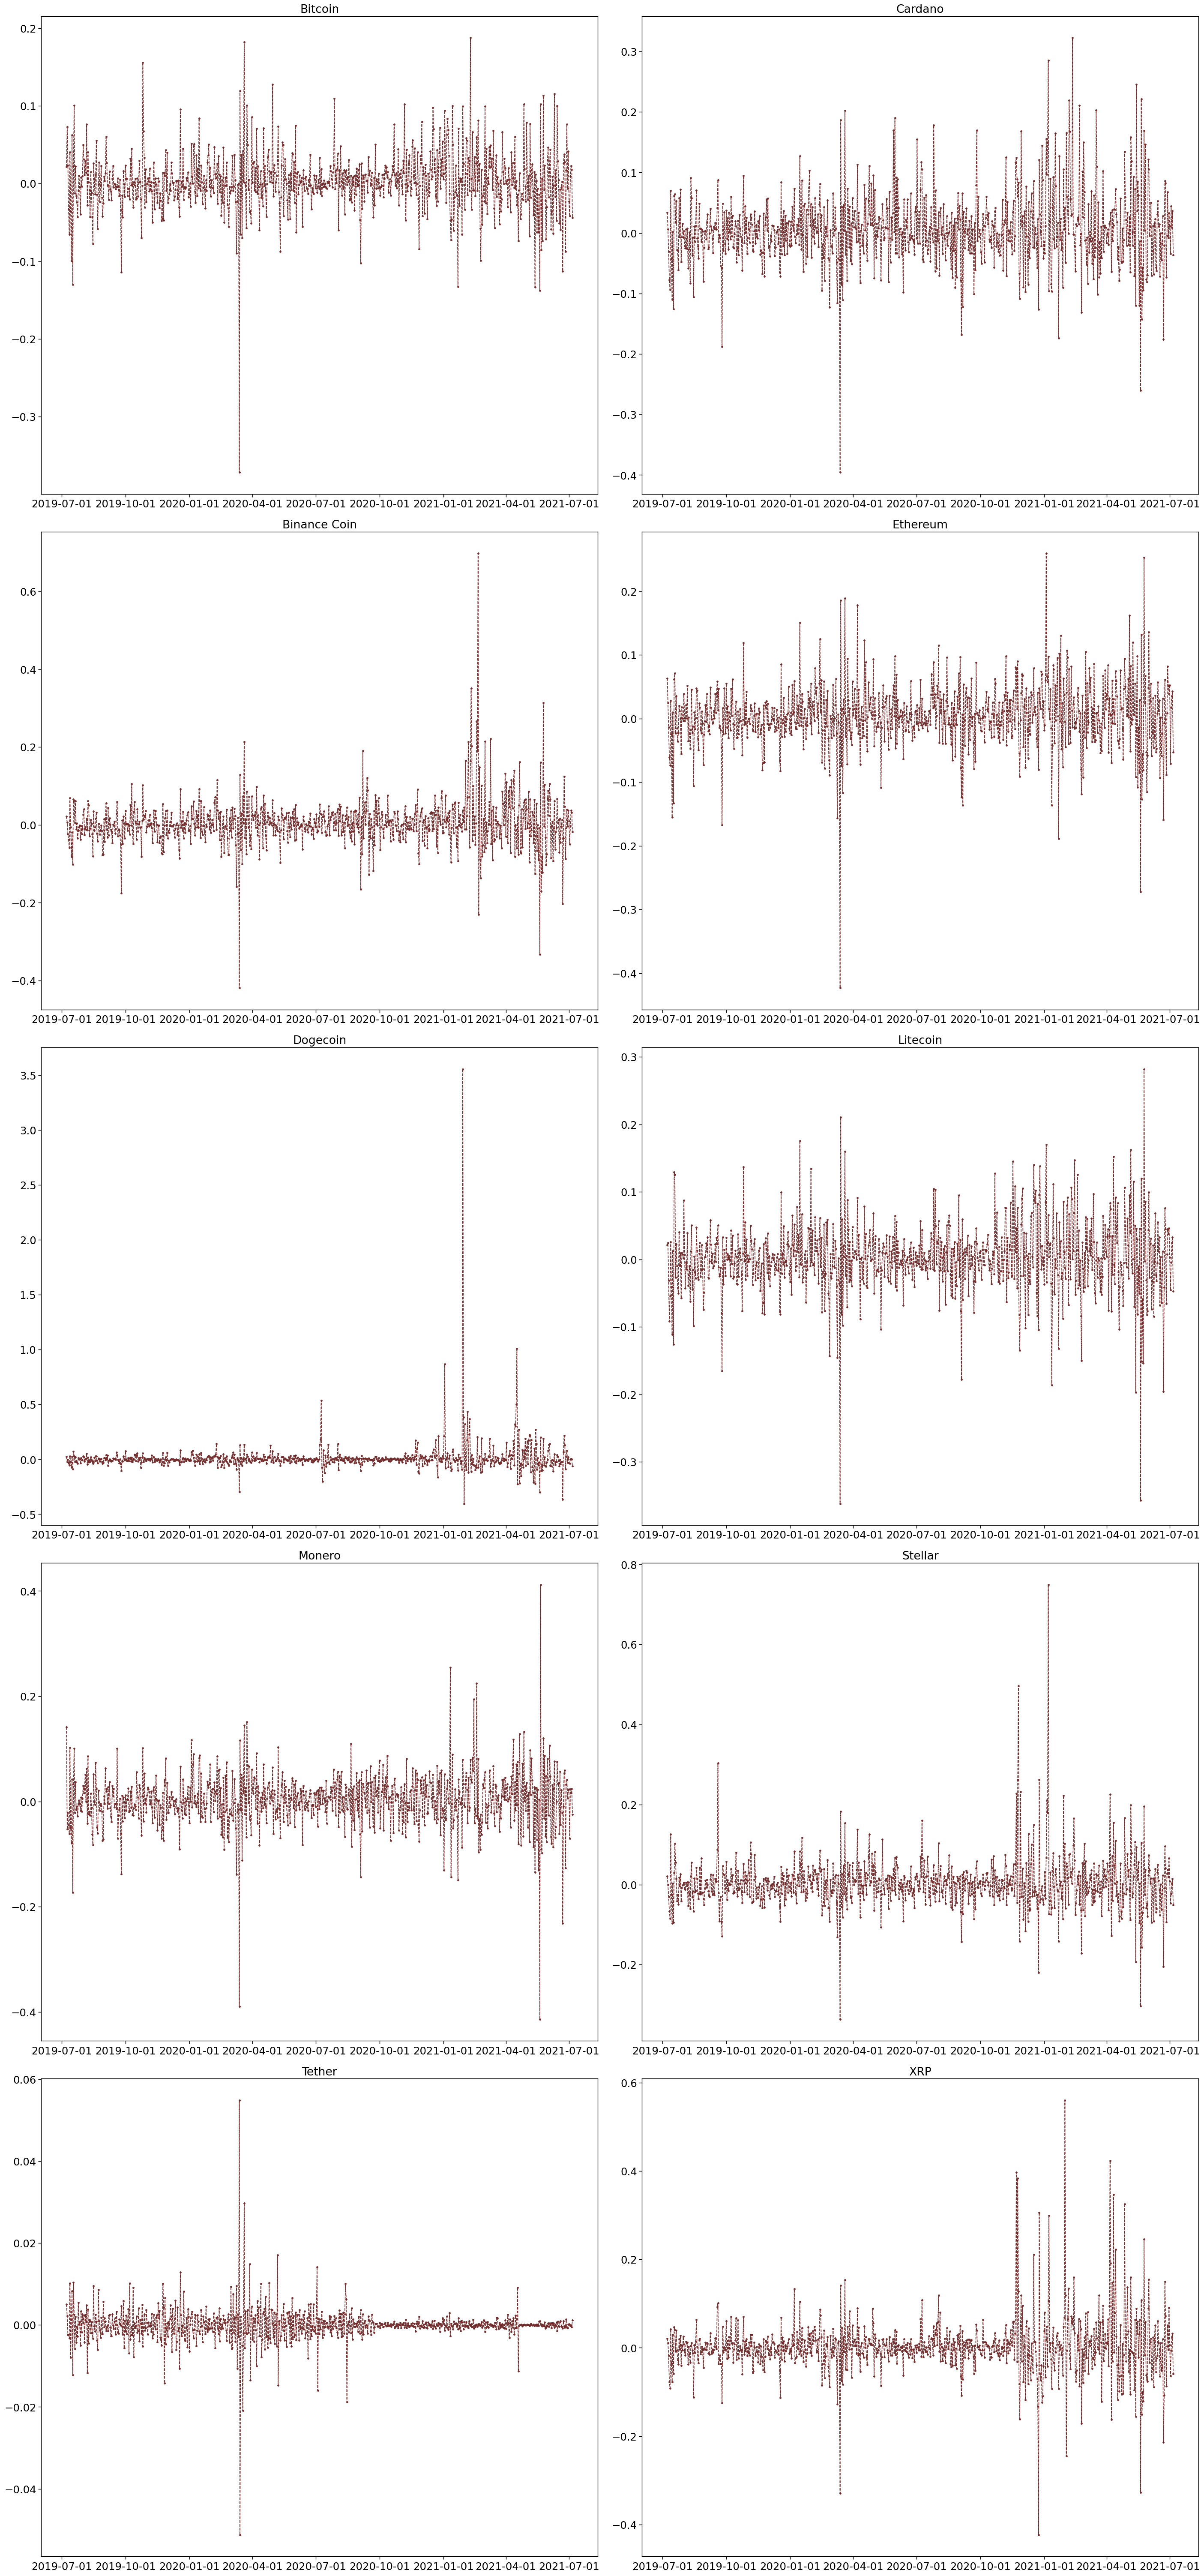

In [ ]:
# for df in cryptoDf:
#     df['Daily_Return'] = df['Close'].pct_change()
# fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
#                         figsize=(14*total_cols, 12*total_rows), constrained_layout=True)
# for i, var in enumerate(crypto):
#     row = i//total_cols
#     pos = i % total_cols
#     cryptoDf[i]['Daily_Return'].plot(ax=axs[row][pos], legend=True,color='#732C2C', linestyle='--', marker='.')
#     axs[row][pos].set_title(crypto[i])
# Assuming cryptoDf and crypto have already been defined, as well as total_rows and total_cols
for df in cryptoDf:
    df['Date'] = pd.to_datetime(df['Date']) # Convert 'Date' to datetime if not already
    df.set_index('Date', inplace=True) # Set 'Date' column as the index for plotting
    df['Daily_Return'] = df['Close'].pct_change()

fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(14*total_cols, 12*total_rows), constrained_layout=True)

for i, coin in enumerate(crypto):
    row = i // total_cols
    pos = i % total_cols
    axs[row][pos].plot(cryptoDf[i].index, cryptoDf[i]['Daily_Return'], color='#732C2C', linestyle='--', marker='.')
    axs[row][pos].set_title(crypto[i])

# Adjusting date formatting for better readability
for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()


C:\Users\nency\AppData\Local\Temp\ipykernel_16060\1959117773.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\nency\AppData\Local\Temp\ipykernel_16060\1959117773.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\nency\AppData\Local\Temp\ipykernel_16060\1959117773.py:6: UserWarning:



`distplot` is

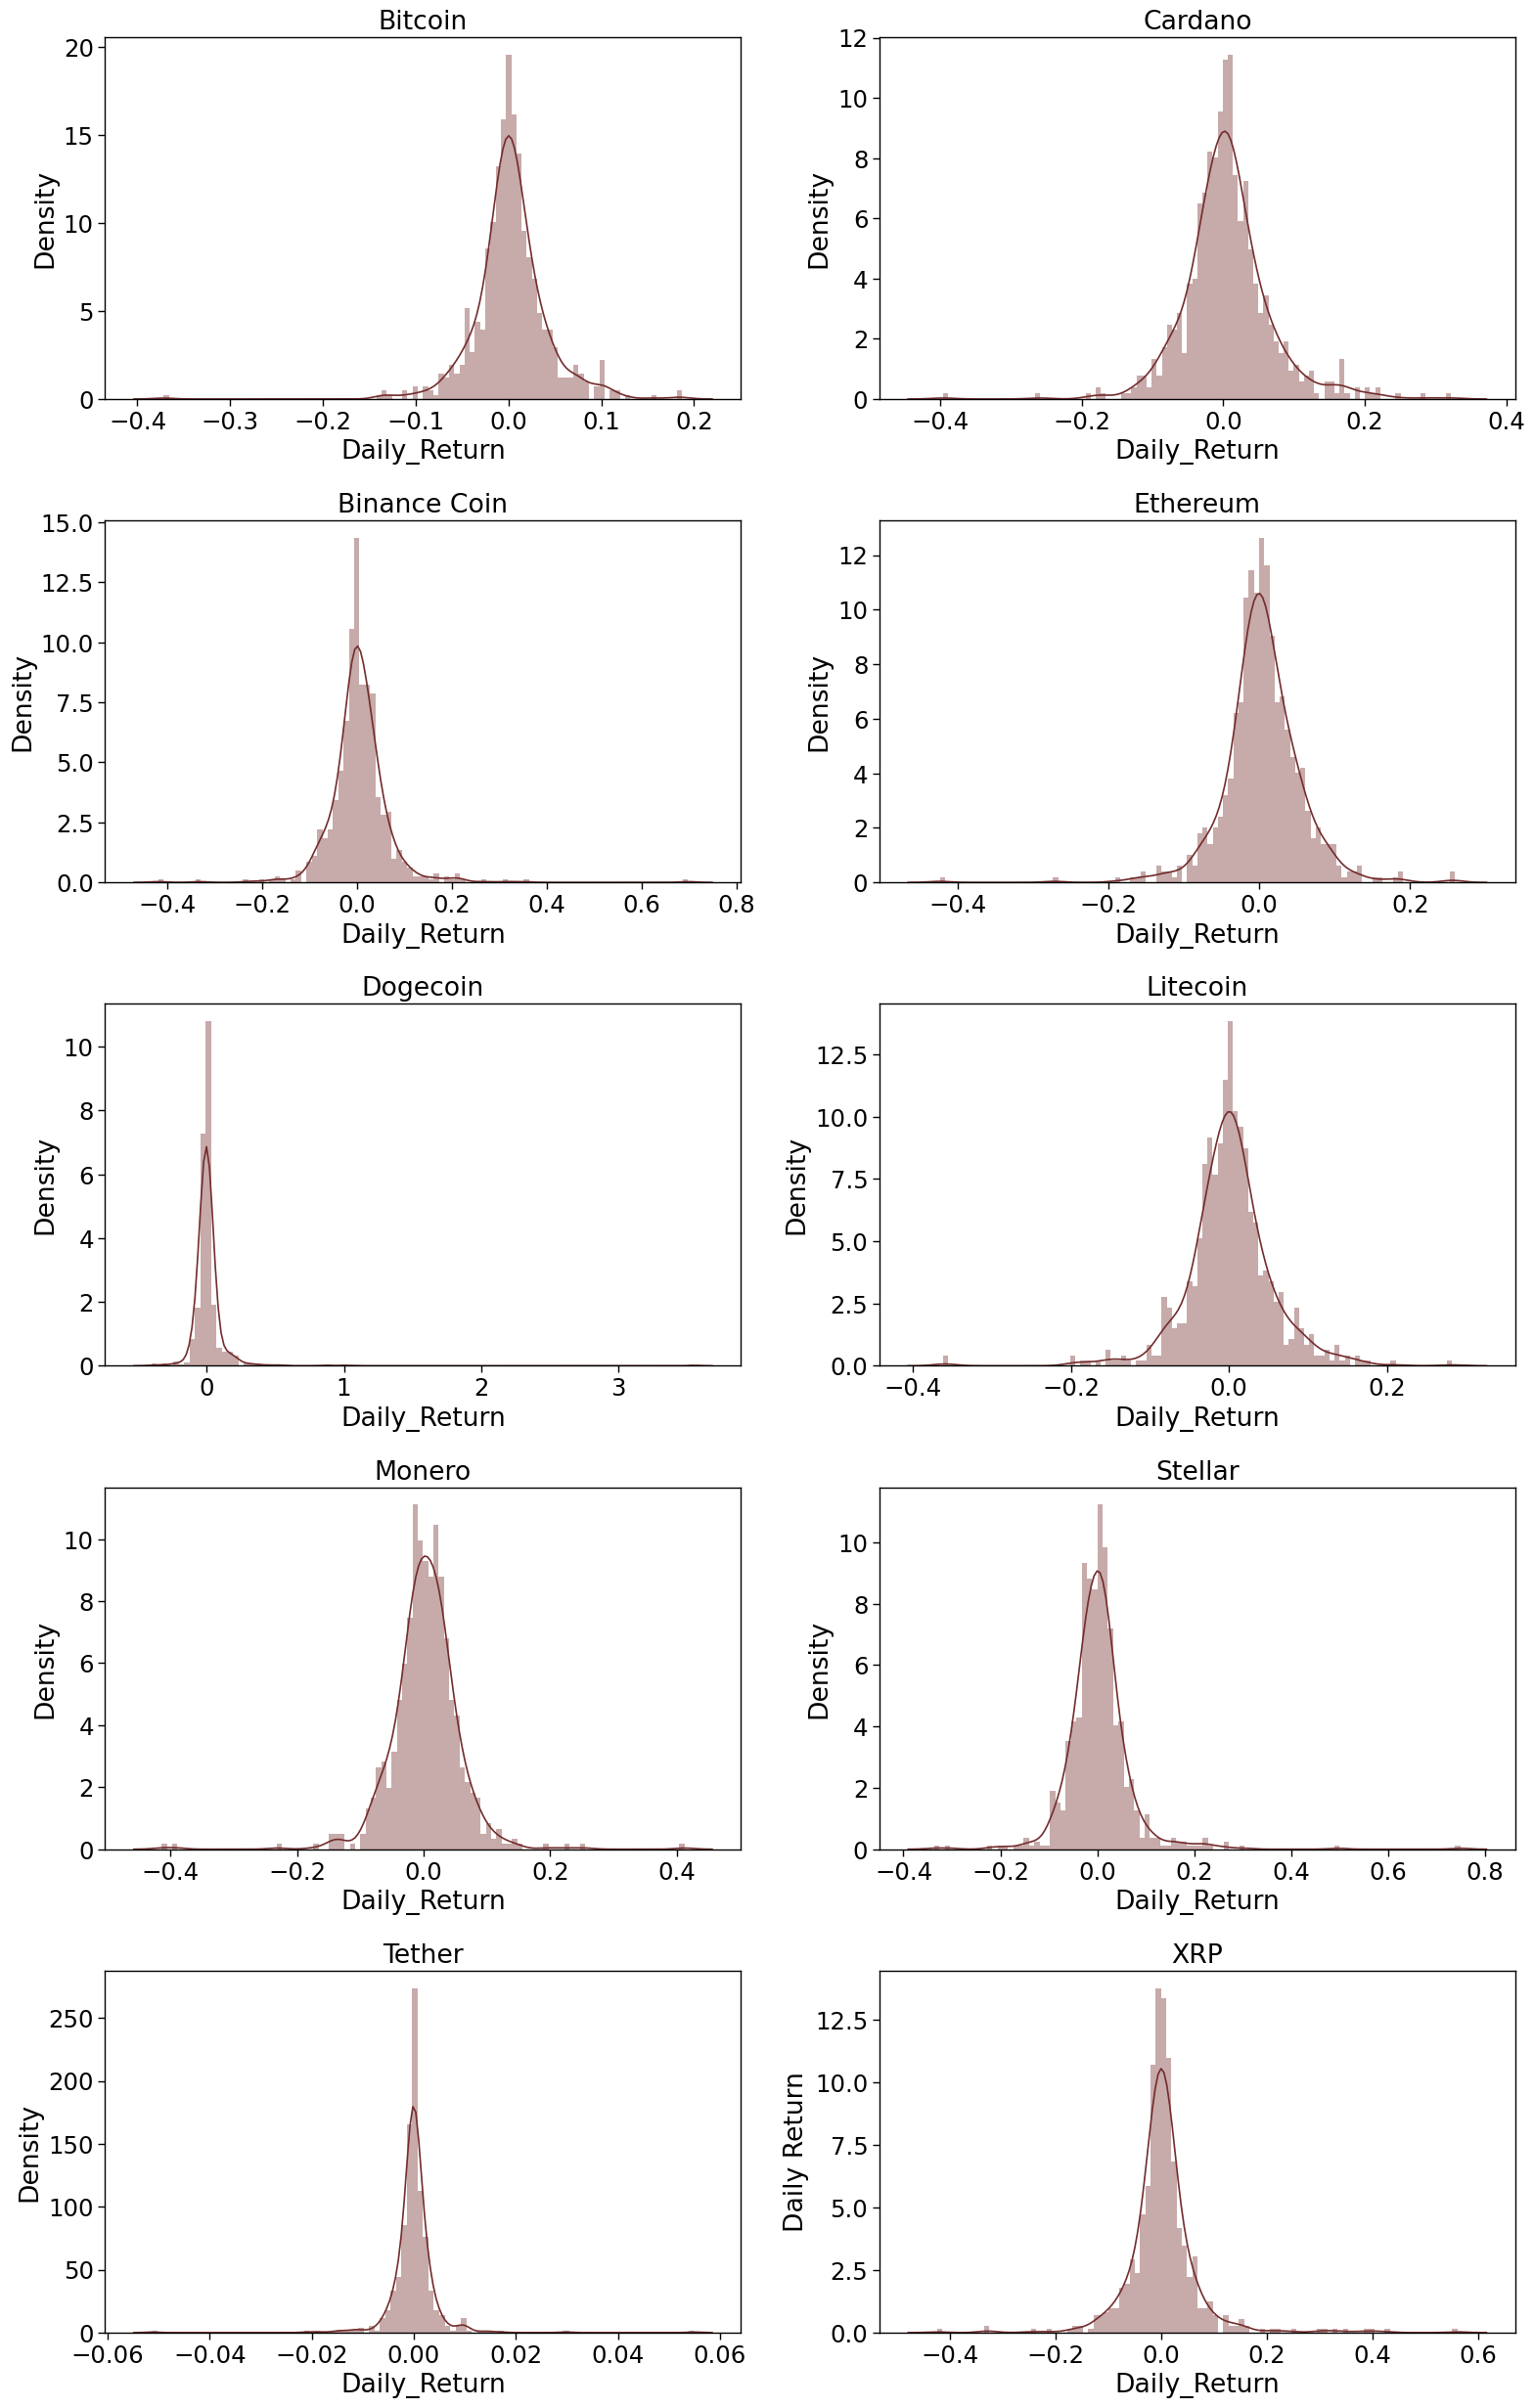

In [ ]:
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(8*total_cols, 5*total_rows))
for i, var in enumerate(crypto):
    row = i//total_cols
    pos = i % total_cols
    plot =sns.distplot(cryptoDf[i]['Daily_Return'], bins=100, color='#732C2C',ax=axs[row][pos])
    axs[row][pos].set_title(crypto[i])
    plt.ylabel('Daily Return')

plt.tight_layout()

In [ ]:
# Fill NaN values in the original 'Close' columns before calculating percentage changes

closeDf=pd.DataFrame()
print(closeDf)

closeDf['btc'] = btc['Close']
closeDf['cda'] = cda['Close']
closeDf['bnb'] = bnb['Close']
closeDf['eth'] = eth['Close']
closeDf['doge'] = doge['Close']
closeDf['ltc'] = ltc['Close']
closeDf['mnr'] = mnr['Close']
closeDf['tlr'] = tlr['Close']
closeDf['thr'] = thr['Close']
closeDf['xrp'] = xrp['Close']

# Calculate percentage change
returns = closeDf.pct_change()
returns.head()


Empty DataFrame
Columns: []
Index: []


btc       cda       bnb       eth      doge  \
Date                                                                    
2019-07-06 23:59:59       NaN       NaN       NaN       NaN       NaN   
2019-07-07 23:59:59  0.021617  0.033987  0.021829  0.063132  0.024435   
2019-07-08 23:59:59  0.072930  0.006407  0.006878  0.024700 -0.020522   
2019-07-09 23:59:59  0.023430 -0.030853 -0.022768 -0.013952 -0.002718   
2019-07-10 23:59:59 -0.033188 -0.077615 -0.037614 -0.061120 -0.035285   

                          ltc       mnr       tlr       thr       xrp  
Date                                                                   
2019-07-06 23:59:59       NaN       NaN       NaN       NaN       NaN  
2019-07-07 23:59:59  0.021195  0.140981  0.021178  0.005053  0.020543  
2019-07-08 23:59:59  0.024639 -0.052216 -0.000291  0.002171  0.011297  
2019-07-09 23:59:59 -0.031250 -0.021345 -0.030372 -0.002395 -0.018341  
2019-07-10 23:59:59 -0.091537 -0.045073 -0.066550 -0.002433 -0.077107

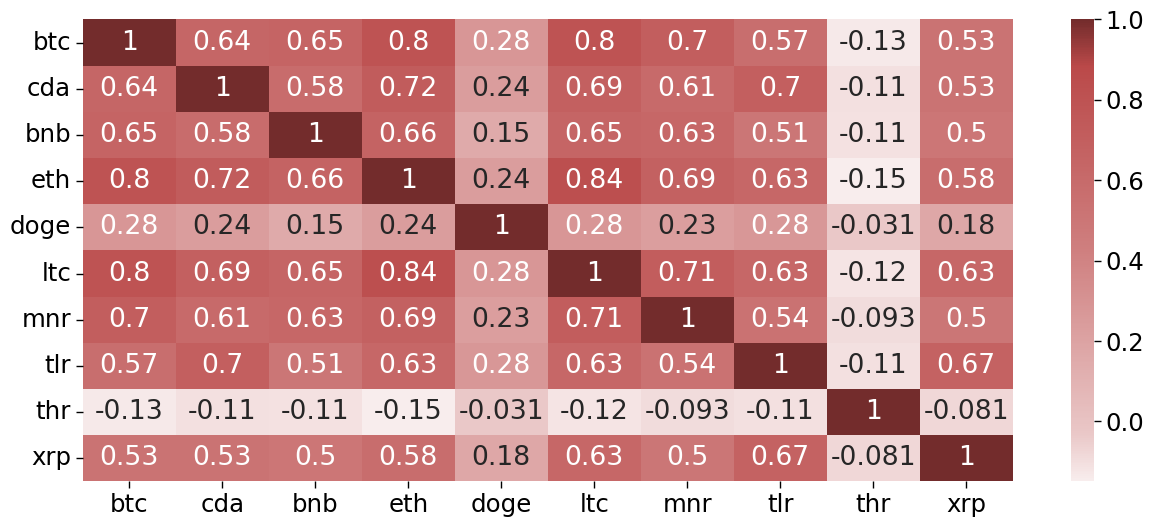

In [ ]:
# Create heatmap for correlation of each coin
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#F8EDED', '#EAC8C8', '#CF7F7F', '#BA4949', '#732C2C']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)
plt.figure(figsize=(15,6))
sns.heatmap(returns.corr(), annot=True, cmap=cm)
plt.show()

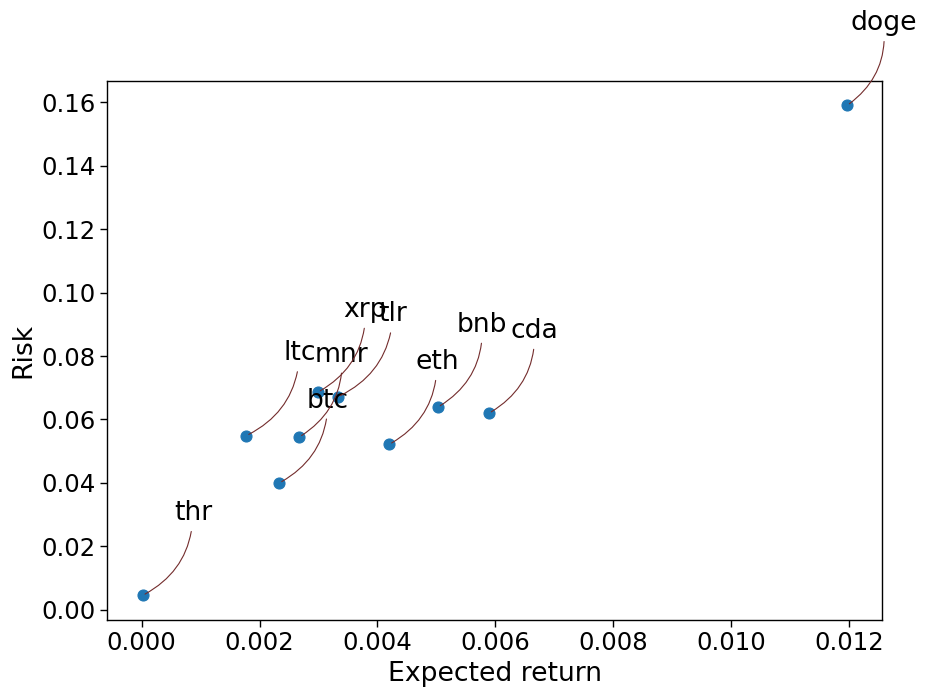

In [ ]:
rets = returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='#732C2C', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# define function to compute log returns
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

In [ ]:
# Select some input features from the trading data: 
# 5 min log return, abs(5 min log return), upper shadow, and lower shadow.
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low

X_btc = pd.concat([log_return(btc.Open,periods=5), log_return(btc.Open,periods=1).abs(), 
               upper_shadow(btc), lower_shadow(btc)], axis=1)
y_btc = btc.Close

X_eth = pd.concat([log_return(eth.Open,periods=5), log_return(eth.Open,periods=1).abs(), 
               upper_shadow(eth), lower_shadow(eth)], axis=1)
y_eth = eth.Close

In [ ]:
# select training and test periods
train_window = [("07/06/2019"), ("07/06/2020")]
test_window = [("07/06/2020"), ("07/06/2021")]

# divide data into train and test, compute X and y
# we aim to build simple regression models using a window_size of 1
X_btc_train = X_btc.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  # filling NaN's with zeros
y_btc_train = y_btc.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  

X_btc_test = X_btc.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 
y_btc_test = y_btc.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 

X_eth_train = X_eth.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  
y_eth_train = y_eth.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  

X_eth_test = X_eth.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 
y_eth_test = y_eth.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 

In [ ]:
from sklearn.preprocessing import StandardScaler
# simple preprocessing of the data 
scaler = StandardScaler()

X_btc_train_scaled = scaler.fit_transform(X_btc_train)
X_btc_test_scaled = scaler.transform(X_btc_test)

X_eth_train_scaled = scaler.fit_transform(X_eth_train)
X_eth_test_scaled = scaler.transform(X_eth_test)


In [ ]:
from sklearn.linear_model import LinearRegression

# implement basic ML baseline (one per asset)
lr = LinearRegression()
lr.fit(X_btc_train_scaled,y_btc_train)
y_pred_lr_btc = lr.predict(X_btc_test_scaled)

lr.fit(X_eth_train_scaled,y_eth_train)
y_pred_lr_eth = lr.predict(X_eth_test_scaled)

In [ ]:
# implement more complex baseline (multiple input/output regression model)
from sklearn.multioutput import MultiOutputRegressor

# we concatenate X and y for both assets
X_both_train = np.concatenate((X_btc_train_scaled, X_eth_train_scaled), axis=1)
X_both_test = np.concatenate((X_btc_test_scaled, X_eth_test_scaled), axis=1)
y_both_train = np.column_stack((y_btc_train, y_eth_train))
y_both_test = np.column_stack((y_btc_test, y_eth_test))

# define the direct multioutput model and fit it
mlr = MultiOutputRegressor(LinearRegression())
mlr.fit(X_both_train,y_both_train)
y_pred_lr_both = mlr.predict(X_both_test)

In [ ]:
print('Test score for LR baseline: BTC', f"{np.corrcoef(y_pred_lr_btc, y_btc_test)[0,1]:.2f}", 
                                ', ETH', f"{np.corrcoef(y_pred_lr_eth, y_eth_test)[0,1]:.2f}")
print('Test score for multiple output LR baseline: BTC', f"{np.corrcoef(y_pred_lr_both[:,0], y_btc_test)[0,1]:.2f}", 
                                                ', ETH', f"{np.corrcoef(y_pred_lr_both[:,1], y_eth_test)[0,1]:.2f}")

Test score for LR baseline: BTC 0.50 , ETH 0.63
Test score for multiple output LR baseline: BTC 0.51 , ETH 0.63


In [ ]:
from sklearn.model_selection import train_test_split
for col in btc.columns:
    if btc[col].dtype == 'object':
        btc[col] = pd.to_numeric(btc[col], errors='coerce')
X = btc.drop('Daily_Return', axis=1)
y = btc['Daily_Return']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\nency\AppData\Local\Temp\ipykernel_16060\643416032.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\nency\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1108: RuntimeWarning:

invalid value encountered in divide

c:\Users\nency\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1113: RuntimeWarning:

invalid value encountered in divide

c:\Users\nency\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\extmath.py:1133: RuntimeWarning:

invalid value encountered in divide



In [ ]:
chosen_col = 'Close'
print(len(ltc))
print(len(eth))
ltc.head()

731
731


id      Name        High         Low        Open  \
Date                                                                      
2019-07-06 23:59:59  9387  Litecoin  121.294059  117.327119  118.378719   
2019-07-07 23:59:59  9388  Litecoin  120.325262  117.641090  118.026007   
2019-07-08 23:59:59  9389  Litecoin  125.082014  118.598566  120.283494   
2019-07-09 23:59:59  9390  Litecoin  124.165418  118.228096  123.247104   
2019-07-10 23:59:59  9391  Litecoin  120.104316  103.822187  119.500997   

                          Close        Volume     Marketcap  Target  assetid  \
Date                                                                           
2019-07-06 23:59:59  117.823620  3.484378e+09  7.369731e+09       0        6   
2019-07-07 23:59:59  120.320878  3.348662e+09  7.527688e+09       1        6   
2019-07-08 23:59:59  123.285485  3.803750e+09  7.714782e+09       1        6   
2019-07-09 23:59:59  119.432812  3.785641e+09  7.475394e+09       0        6   
2019-07-10 23:59:59  108.500258  4.699512e+09  6.792744e+09       0        6   

                     Daily_Return  
Date                               
2019-07-06 23:59:59           NaN  
2019-07-07 23:59:59      0.021195  
2019-07-08 23:59:59      0.024639  
2019-07-09 23:59:59     -0.031250  
2019-07-10 23:59:59     -0.091537

In [ ]:
split_row = len(ltc) - int(0.2 * len(ltc))
train_data = ltc.iloc[:split_row]
test_data = ltc.iloc[split_row:]

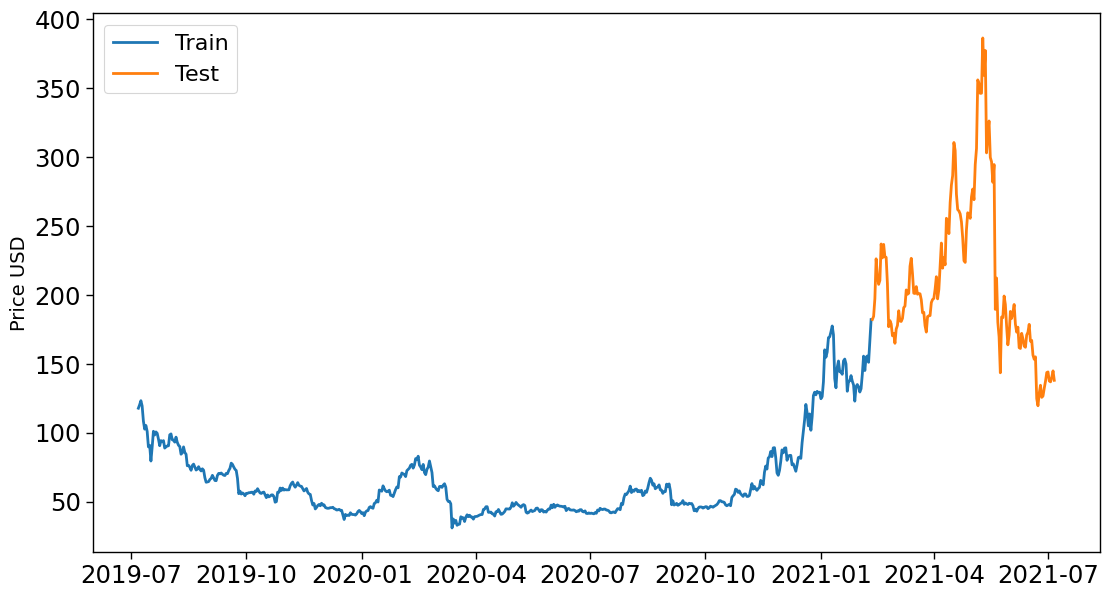

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(train_data[chosen_col], label='Train', linewidth=2)
ax.plot(test_data[chosen_col], label='Test', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [ ]:
print(train_data[chosen_col].shape)

(585,)


In [ ]:
datacol = ltc.iloc[:, 3:4].values
traincol = train_data.iloc[:, 3:4].values
testcol = test_data.iloc[:, 3:4].values

shaped_data = np.reshape(datacol, (-1,1))
train_shaped = np.reshape(traincol, (-1,1))
test_shaped = np.reshape(testcol, (-1,1))

sc = MinMaxScaler(feature_range=(0,1))
sc.fit(shaped_data)

train_scaled_data = sc.transform(train_shaped)
test_scaled_data = sc.transform(test_shaped)

In [ ]:
X = []
y = []
time_steps = 50

for i in range(time_steps, len(train_data)):
    X.append(train_scaled_data[i-time_steps:i,0])
    y.append(train_scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(optimizer='adam', loss='mse')

c:\Users\nency\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1, callbacks=[callback], shuffle=True)

Epoch 1/100


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0088 - val_loss: 0.0018
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0024 - val_loss: 7.0705e-04
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.5277e-04 - val_loss: 3.4361e-04
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.0147e-04 - val_loss: 4.9170e-04
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.0704e-04 - val_loss: 3.6061e-04
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.3887e-04 - val_loss: 2.8181e-04
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.1116e-04 - val_loss: 2.5178e-04
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8418e-04 - val_loss: 3.1077e-04
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.2019e-04 - val_loss: 3.6451e-04
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.9747e-04 - val_loss: 3.4160e-04
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.5333e-04 - val_loss:

In [ ]:
X_testing = []
y_testing = []

for i in range(time_steps, len(test_data)):
    X_testing.append(test_scaled_data[i-time_steps:i,0])
    y_testing.append(test_scaled_data[i, 0])

X_testing, y_testing = np.array(X_testing), np.array(y_testing)
X_testing = np.reshape(X_testing, (X_testing.shape[0], X_testing.shape[1], 1))

predicted_price = model.predict(X_testing)
inv_price = sc.inverse_transform(predicted_price)
real_price = np.reshape(y_testing, (-1,1))
real_price = sc.inverse_transform(real_price)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 


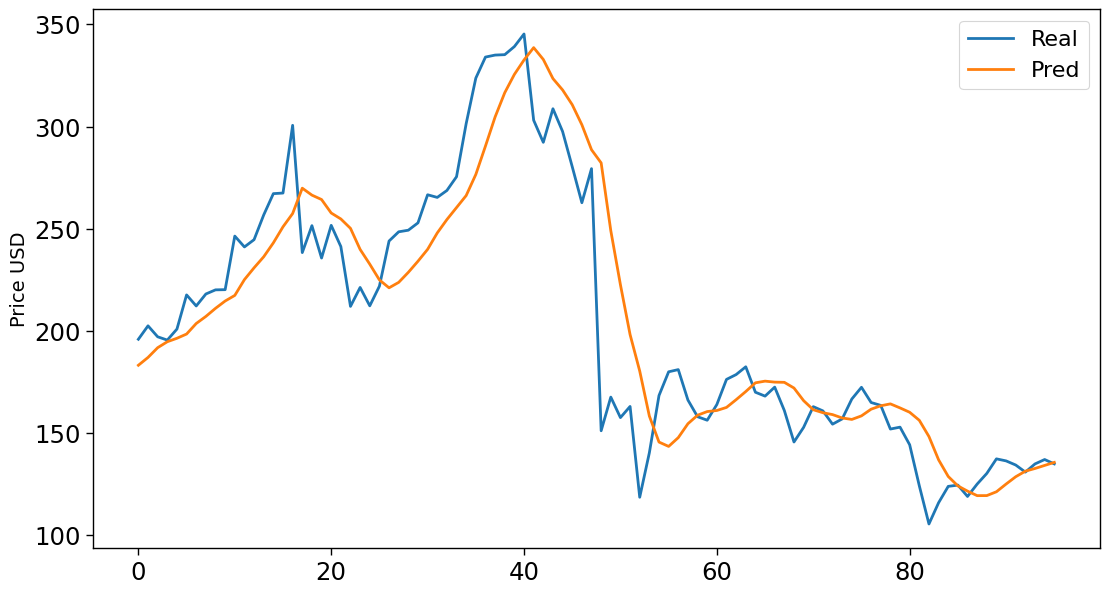

In [ ]:
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.plot(real_price, label='Real', linewidth=2)
ax.plot(inv_price, label='Predicted Value', linewidth=2)
ax.set_ylabel('Price USD', fontsize=14)
ax.set_title('', fontsize=16)
ax.legend(loc='best', fontsize=16)

In [ ]:
model.save("crypto_pred.h5")

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'real_price' and 'inv_price' are your actual and predicted prices, respectively
mse = mean_squared_error(real_price, inv_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_price, inv_price)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


MSE: 721.1539352255091
RMSE: 26.85430943490279
MAE: 18.98692770585551


### Prophet Model

<Axes: xlabel='Date'>

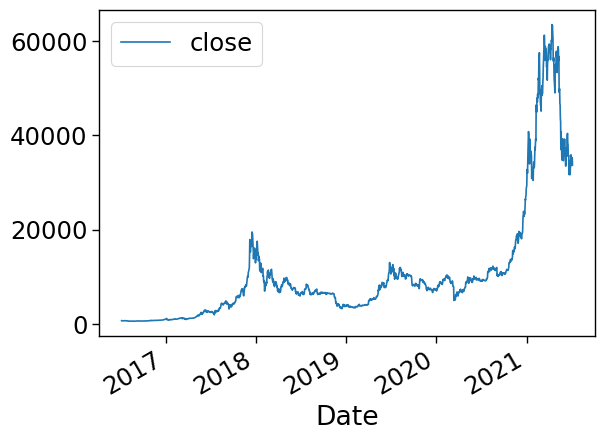

In [312]:
# Plotting Bitcoin Data

# crypto_df.plot.line(y="Close", use_index=True)
crypto_df[crypto_df['Name'] == 'Bitcoin'].plot.line(y="close", use_index=True)


In [313]:
# Reading Wikipedia Edits Data

wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [314]:
wiki

edit_count  sentiment  neg_sentiment
2009-04-06    0.133333  -0.018351       0.025000
2009-04-07    0.000000   0.000000       0.000000
2009-04-08    0.000000   0.000000       0.000000
2009-04-09    0.000000   0.000000       0.000000
2009-04-10    0.000000   0.000000       0.000000
...                ...        ...            ...
2022-09-04    0.400000  -0.108480       0.150000
2022-09-05    0.400000  -0.108480       0.150000
2022-09-06    0.433333  -0.081502       0.150000
2022-09-07    0.433333  -0.081502       0.150000
2022-09-08    0.466667  -0.114104       0.183333

[4904 rows x 3 columns]

In [336]:
# Ensure indices are DatetimeIndex and round to nearest day if necessary
crypto_df.index = pd.to_datetime(crypto_df.index).normalize()
wiki.index = pd.to_datetime(wiki.index).normalize()


In [337]:
# Perform an outer merge to check for non-matching dates
btc = crypto_df[crypto_df['name'] == 'Bitcoin'].merge(wiki, left_index=True, right_index=True, how='outer')
print(btc.notnull().sum())  # This will show the number of non-NA values in each column.


id               1826
name             1826
high             1826
low              1826
open             1826
close            1826
volume           1826
marketcap        1826
target           1826
assetid          1826
edit_count       4904
sentiment        4904
neg_sentiment    4904
dtype: int64


In [338]:
# After filtering for Bitcoin, check the date range again
filtered_btc_dates = crypto_df[crypto_df['name'] == 'Bitcoin'].index
print("Filtered BTC Dates Range:", filtered_btc_dates.min(), "-", filtered_btc_dates.max())


Filtered BTC Dates Range: 2016-07-06 00:00:00 - 2021-07-05 00:00:00


In [339]:
# First, ensure both dataframes' indices are timezone-naive
crypto_df.index = crypto_df.index.tz_localize(None)
wiki.index = wiki.index.tz_localize(None)

# Filter for Bitcoin data in crypto_df assuming 'name' column indicates the cryptocurrency name
bitcoin_df = crypto_df[crypto_df['name'] == 'Bitcoin']

# Merge the filtered Bitcoin data with the wiki data on their indices
btc_wiki_merged = bitcoin_df.merge(wiki, left_index=True, right_index=True, how='inner')
# btc_wiki_merged

In [340]:
# Merging Datasets and Timezone Adjustment

# wiki.index = wiki.index.tz_localize('UTC')
# wiki.index = wiki.index.tz_convert('UTC')

# merged_df = crypto_df[crypto_df['Name'] == 'Bitcoin'].merge(wiki, left_index=True, right_index=True)

# merged_df = crypto_df.merge(wiki, left_index=True, right_index=True)
crypto_df.index = crypto_df.index.tz_localize(None)
wiki.index = wiki.index.tz_localize(None)
btc = crypto_df[crypto_df['name'] == 'Bitcoin'].merge(wiki, left_index=True, right_index=True)


In [342]:
# Renaming Columns

crypto_df.columns = [c.lower() for c in crypto_df.columns]

In [343]:
# btc = crypto_df.merge(wiki, left_index=True, right_index=True)
btc = crypto_df[crypto_df['name'] == 'Bitcoin'].merge(wiki, left_index=True, right_index=True)


In [344]:
btc

id     name          high           low          open  \
2016-07-06  1441  Bitcoin    681.898010    670.418030    670.418030   
2016-07-07  1442  Bitcoin    682.432007    611.833984    678.090027   
2016-07-08  1443  Bitcoin    666.706970    636.466980    640.687988   
2016-07-09  1444  Bitcoin    666.383972    633.398987    666.383972   
2016-07-10  1445  Bitcoin    652.294006    641.263977    650.598999   
...          ...      ...           ...           ...           ...   
2021-07-01  3262  Bitcoin  35035.982712  32883.781226  35035.982712   
2021-07-02  3263  Bitcoin  33939.588699  32770.680780  33549.600177   
2021-07-03  3264  Bitcoin  34909.259899  33402.696536  33854.421362   
2021-07-04  3265  Bitcoin  35937.567147  34396.477458  34665.564866   
2021-07-05  3266  Bitcoin  35284.344430  33213.661034  35284.344430   

                   close        volume     marketcap  target  assetid  \
2016-07-06    677.330994  1.349610e+08  1.066146e+10       1        2   
2016-07-07    640.562012  2.580910e+08  1.008488e+10       0        2   
2016-07-08    666.523010  1.419700e+08  1.049604e+10       1        2   
2016-07-09    650.960022  1.805360e+08  1.025298e+10       0        2   
2016-07-10    649.359985  1.025320e+08  1.022900e+10       0        2   
...                  ...           ...           ...     ...      ...   
2021-07-01  33572.117653  3.783896e+10  6.293393e+11       0        2   
2021-07-02  33897.048590  3.872897e+10  6.354508e+11       1        2   
2021-07-03  34668.548402  2.438396e+10  6.499397e+11       1        2   
2021-07-04  35287.779766  2.492431e+10  6.615748e+11       1        2   
2021-07-05  33746.002456  2.672155e+10  6.326962e+11       0        2   

            edit_count  sentiment  neg_sentiment  
2016-07-06    2.533333  -0.361808       0.468472  
2016-07-07    2.566667  -0.427848       0.501806  
2016-07-08    2.566667  -0.427591       0.501806  
2016-07-09    2.966667  -0.442836       0.508472  
2016-07-10    3.733333  -0.465129       0.536008  
...                ...        ...            ...  
2021-07-01    1.366667  -0.091942       0.276587  
2021-07-02    1.333333  -0.058618       0.243254  
2021-07-03    1.333333  -0.058618       0.243254  
2021-07-04    1.333333  -0.058618       0.243254  
2021-07-05    1.300000  -0.025333       0.209921  

[1826 rows x 13 columns]

In [346]:
# Preparing Data for Prediction

btc["tomorrow"] = btc["close"].shift(-1)
btc

id     name          high           low          open  \
2016-07-06  1441  Bitcoin    681.898010    670.418030    670.418030   
2016-07-07  1442  Bitcoin    682.432007    611.833984    678.090027   
2016-07-08  1443  Bitcoin    666.706970    636.466980    640.687988   
2016-07-09  1444  Bitcoin    666.383972    633.398987    666.383972   
2016-07-10  1445  Bitcoin    652.294006    641.263977    650.598999   
...          ...      ...           ...           ...           ...   
2021-07-01  3262  Bitcoin  35035.982712  32883.781226  35035.982712   
2021-07-02  3263  Bitcoin  33939.588699  32770.680780  33549.600177   
2021-07-03  3264  Bitcoin  34909.259899  33402.696536  33854.421362   
2021-07-04  3265  Bitcoin  35937.567147  34396.477458  34665.564866   
2021-07-05  3266  Bitcoin  35284.344430  33213.661034  35284.344430   

                   close        volume     marketcap  target  assetid  \
2016-07-06    677.330994  1.349610e+08  1.066146e+10       1        2   
2016-07-07    640.562012  2.580910e+08  1.008488e+10       0        2   
2016-07-08    666.523010  1.419700e+08  1.049604e+10       1        2   
2016-07-09    650.960022  1.805360e+08  1.025298e+10       0        2   
2016-07-10    649.359985  1.025320e+08  1.022900e+10       0        2   
...                  ...           ...           ...     ...      ...   
2021-07-01  33572.117653  3.783896e+10  6.293393e+11       0        2   
2021-07-02  33897.048590  3.872897e+10  6.354508e+11       1        2   
2021-07-03  34668.548402  2.438396e+10  6.499397e+11       1        2   
2021-07-04  35287.779766  2.492431e+10  6.615748e+11       1        2   
2021-07-05  33746.002456  2.672155e+10  6.326962e+11       0        2   

            edit_count  sentiment  neg_sentiment      tomorrow  
2016-07-06    2.533333  -0.361808       0.468472    640.562012  
2016-07-07    2.566667  -0.427848       0.501806    666.523010  
2016-07-08    2.566667  -0.427591       0.501806    650.960022  
2016-07-09    2.966667  -0.442836       0.508472    649.359985  
2016-07-10    3.733333  -0.465129       0.536008    647.658997  
...                ...        ...            ...           ...  
2021-07-01    1.366667  -0.091942       0.276587  33897.048590  
2021-07-02    1.333333  -0.058618       0.243254  34668.548402  
2021-07-03    1.333333  -0.058618       0.243254  35287.779766  
2021-07-04    1.333333  -0.058618       0.243254  33746.002456  
2021-07-05    1.300000  -0.025333       0.209921           NaN  

[1826 rows x 14 columns]

In [347]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [348]:
btc["target"].value_counts()

target
1    999
0    827
Name: count, dtype: int64

In [351]:
btc_df = crypto_df[crypto_df['name'] == 'Bitcoin']
btc_df

id     name          high           low          open  \
Date                                                                  
2016-07-06  1441  Bitcoin    681.898010    670.418030    670.418030   
2016-07-07  1442  Bitcoin    682.432007    611.833984    678.090027   
2016-07-08  1443  Bitcoin    666.706970    636.466980    640.687988   
2016-07-09  1444  Bitcoin    666.383972    633.398987    666.383972   
2016-07-10  1445  Bitcoin    652.294006    641.263977    650.598999   
...          ...      ...           ...           ...           ...   
2021-07-01  3262  Bitcoin  35035.982712  32883.781226  35035.982712   
2021-07-02  3263  Bitcoin  33939.588699  32770.680780  33549.600177   
2021-07-03  3264  Bitcoin  34909.259899  33402.696536  33854.421362   
2021-07-04  3265  Bitcoin  35937.567147  34396.477458  34665.564866   
2021-07-05  3266  Bitcoin  35284.344430  33213.661034  35284.344430   

                   close        volume     marketcap  target  assetid  
Date                                                                   
2016-07-06    677.330994  1.349610e+08  1.066146e+10       1        2  
2016-07-07    640.562012  2.580910e+08  1.008488e+10       0        2  
2016-07-08    666.523010  1.419700e+08  1.049604e+10       1        2  
2016-07-09    650.960022  1.805360e+08  1.025298e+10       0        2  
2016-07-10    649.359985  1.025320e+08  1.022900e+10       0        2  
...                  ...           ...           ...     ...      ...  
2021-07-01  33572.117653  3.783896e+10  6.293393e+11       0        2  
2021-07-02  33897.048590  3.872897e+10  6.354508e+11       1        2  
2021-07-03  34668.548402  2.438396e+10  6.499397e+11       1        2  
2021-07-04  35287.779766  2.492431e+10  6.615748e+11       1        2  
2021-07-05  33746.002456  2.672155e+10  6.326962e+11       0        2  

[1826 rows x 10 columns]

In [355]:
# Importing necessary libraries

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn import metrics

# Load the dataset
# file_path = 'btc.csv'
# btc_df = pd.read_csv(file_path)
# btc_df = crypto_df[crypto_df['name'] == 'Bitcoin']

# Add a target column: 1 if the close price increased compared to the previous day, else 0
btc_df['target'] = (btc_df['close'].shift(-1) > btc_df['close']).astype(int)

# Drop the last row as it will have NaN in the target
btc_df = btc_df[:-1]

# Select features - excluding 'Date', 'Target', and any other non-relevant columns
X = btc_df.drop([ 'name','target','open','close','high','low','volume'], axis=1)
y = btc_df['target']

# Define the model with increased complexity
model = RandomForestClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
f1_score = metrics.f1_score(y_test, predictions)
print(f"f1_score: {f1_score}")
recall_score = metrics.recall_score(y_test, predictions)
print(f"recall_score: {recall_score}")
precision_score = metrics.precision_score(y_test, predictions)
print(f"precision_score: {precision_score}")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(f"confusion_matrix: {confusion_matrix}")




Accuracy: 0.5095890410958904
f1_score: 0.544529262086514
recall_score: 0.5515463917525774
precision_score: 0.5376884422110553
confusion_matrix: [[ 79  92]
 [ 87 107]]


In [356]:
# Splitting the Data into Training and Validation Sets

from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [357]:
# Choosing the model and Setting Up Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)


In [358]:
# Hyperparameter Tuning Using the Validation Set

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(X_val, y_val)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Validation Set Accuracy: {validation_accuracy}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Validation Set Accuracy: 0.536986301369863


In [359]:
# Evaluating error with Backtesting

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [360]:
# Using Backtest Function

def backtest(data, model, predictors, start=1095, step=150)  :
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [361]:
pip install xgboost



   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 3.2 MB/s eta 0:00:32
   ---------------------------------------- 0.6/99.8 MB 7.4 MB/s eta 0:00:14
    --------------------------------------- 1.3/99.8 MB 8.9 MB/s eta 0:00:12
    --------------------------------------- 2.3/99.8 MB 12.2 MB/s eta 0:00:08
   - -------------------------------------- 3.4/99.8 MB 14.6 MB/s eta 0:00:07
   - -------------------------------------- 4.3/99.8 MB 15.3 MB/s eta 0:00:07
   -- ------------------------------------- 5.8/99.8 MB 17.5 MB/s eta 0:00:06
   -- ------------------------------------- 6.6/99.8 MB 17.7 MB/s eta 0:00:06
   --- ------------------------------------ 7.9/99.8 MB 18.6 MB/s eta 0:00:05
   --- ------------------------------------ 9.0/99.8 MB 19.2 MB/s eta 0:00:05
   ---- ----------------------------------- 10.1/99.8 MB 19.6 MB/s eta 0:00:05
   ---- ----------------------------------- 11.3/99.8 MB 23.4 MB/s eta 0:


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [362]:
# Importing necessary libraries

import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  f1_score, recall_score, precision_score, confusion_matrix

# Load the dataset
file_path = 'btc.csv'
btc_df = pd.read_csv(file_path)

# Add a target column: 1 if the close price increased compared to the previous day, else 0
btc_df['Target'] = (btc_df['Close'].shift(-1) > btc_df['Close']).astype(int)

# Drop the last row as it will have NaN in the target
btc_df = btc_df[:-1]

# Select features - excluding 'Date', 'Target', and any other non-relevant columns
X = btc_df.drop(['Date', 'Target'], axis=1)
y = btc_df['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
f1_score = metrics.f1_score(y_test, predictions)
print(f"f1_score: {f1_score}")
recall_score = metrics.recall_score(y_test, predictions)
print(f"recall_score: {recall_score}")
precision_score = metrics.precision_score(y_test, predictions)
print(f"precision_score: {precision_score}")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(f"confusion_matrix: {confusion_matrix}")


Accuracy: 0.5077186963979416
f1_score: 0.5466034755134281
recall_score: 0.5672131147540984
precision_score: 0.5274390243902439
confusion_matrix: [[123 155]
 [132 173]]


In [363]:
# Improving Precision with Trends

def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [365]:
# btc, new_predictors = compute_rolling(btc.copy())
predictions

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [366]:
# Simple Moving Average (SMA) Indicator

def calculate_sma(data, window):
    return data['close'].rolling(window=window).mean()

# Example usage
btc['SMA_20'] = calculate_sma(btc, 20)  # 20-day SMA
btc['SMA_50'] = calculate_sma(btc, 50)  # 50-day SMA



In [367]:
# Display the Data Frame with SMAs

print(btc.head())


              id     name        high         low        open       close  \
2016-07-06  1441  Bitcoin  681.898010  670.418030  670.418030  677.330994   
2016-07-07  1442  Bitcoin  682.432007  611.833984  678.090027  640.562012   
2016-07-08  1443  Bitcoin  666.706970  636.466980  640.687988  666.523010   
2016-07-09  1444  Bitcoin  666.383972  633.398987  666.383972  650.960022   
2016-07-10  1445  Bitcoin  652.294006  641.263977  650.598999  649.359985   

                 volume     marketcap  target  assetid  edit_count  sentiment  \
2016-07-06  134960992.0  1.066146e+10       0        2    2.533333  -0.361808   
2016-07-07  258091008.0  1.008488e+10       1        2    2.566667  -0.427848   
2016-07-08  141970000.0  1.049604e+10       0        2    2.566667  -0.427591   
2016-07-09  180536000.0  1.025298e+10       0        2    2.966667  -0.442836   
2016-07-10  102532000.0  1.022900e+10       0        2    3.733333  -0.465129   

            neg_sentiment    tomorrow  SMA_20  SMA

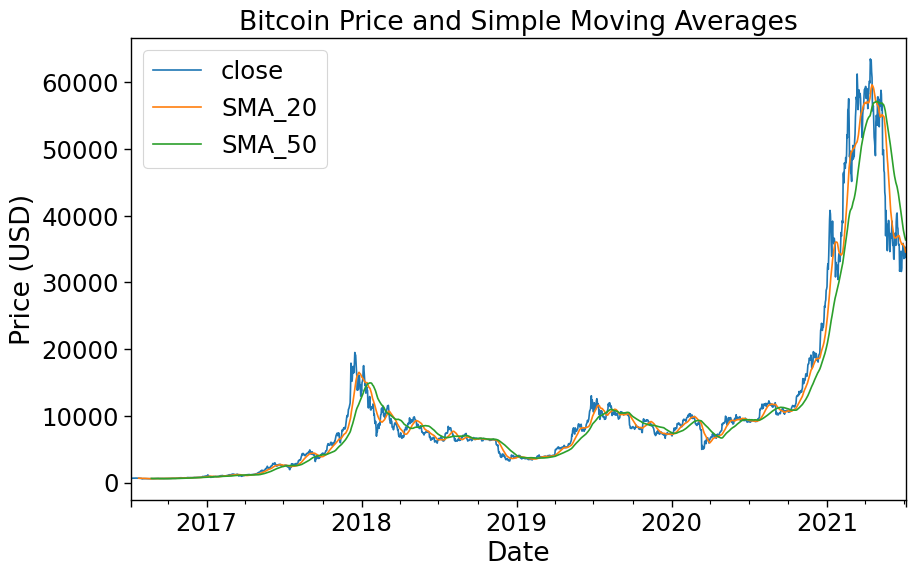

In [368]:
# Plotting the Data

import matplotlib.pyplot as plt

btc[['close', 'SMA_20', 'SMA_50']].plot(figsize=(10,6))
plt.title('Bitcoin Price and Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()


In [369]:
#  Descriptive Statistics

print(btc[['SMA_20', 'SMA_50']].describe())


             SMA_20        SMA_50
count   1807.000000   1777.000000
mean   10661.415800  10530.510457
std    12777.651047  12504.579299
min      576.393198    590.003662
25%     3787.395396   3779.402148
50%     7391.982007   7615.190708
75%    10395.426669  10432.339213
max    59618.642612  57132.158566


In [370]:
# Tail of the Data Frame

print(btc.tail())


              id     name          high           low          open  \
2021-07-01  3262  Bitcoin  35035.982712  32883.781226  35035.982712   
2021-07-02  3263  Bitcoin  33939.588699  32770.680780  33549.600177   
2021-07-03  3264  Bitcoin  34909.259899  33402.696536  33854.421362   
2021-07-04  3265  Bitcoin  35937.567147  34396.477458  34665.564866   
2021-07-05  3266  Bitcoin  35284.344430  33213.661034  35284.344430   

                   close        volume     marketcap  target  assetid  \
2021-07-01  33572.117653  3.783896e+10  6.293393e+11       1        2   
2021-07-02  33897.048590  3.872897e+10  6.354508e+11       1        2   
2021-07-03  34668.548402  2.438396e+10  6.499397e+11       1        2   
2021-07-04  35287.779766  2.492431e+10  6.615748e+11       0        2   
2021-07-05  33746.002456  2.672155e+10  6.326962e+11       0        2   

            edit_count  sentiment  neg_sentiment      tomorrow        SMA_20  \
2021-07-01    1.366667  -0.091942       0.276587  3389

In [371]:
# Real Time Data Analysis

import yfinance as yf

def fetch_realtime_price(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    btc_data = ticker.history(period="1d")
    return btc_data['Close'].iloc[-1]

# Fetch the latest Bitcoin price
latest_price = fetch_realtime_price("BTC-USD")
print("Latest Bitcoin Price: USD", latest_price)


Latest Bitcoin Price: USD 70452.046875


In [372]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [375]:
# List of cryptocurrencies for the portfolio
cryptos = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD']

# Fetch historical data
data = yf.download(cryptos, start='2020-01-01', end='2024-01-01')['Close']


[*********************100%%**********************]  5 of 5 completed


In [376]:
# Calculate daily returns
returns = data.pct_change().dropna()


In [377]:
# Mean daily returns and covariance
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()


In [378]:
# Number of portfolios to simulate
num_portfolios = 10000

# The number of rows in the results array should be 3 (for return, stdev, and sharpe) plus the number of cryptos
num_rows = 3 + len(cryptos)

# Set up array to hold results
results = np.zeros((num_rows, num_portfolios))

for i in range(num_portfolios):
    # Select random weights for portfolio holdings
    weights = np.random.random(len(cryptos))
    weights /= np.sum(weights)
    
    # Calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    # Store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    # Store Sharpe Ratio (assuming risk-free rate is 0)
    results[2,i] = results[0,i] / results[1,i]
    # Store weights for each cryptocurrency
    for j in range(len(weights)):
        results[3+j,i] = weights[j]



In [379]:
# Convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T, columns=['ret', 'stdev', 'sharpe'] + cryptos)

# Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]


C:\Users\nency\AppData\Local\Temp\ipykernel_16060\390110321.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



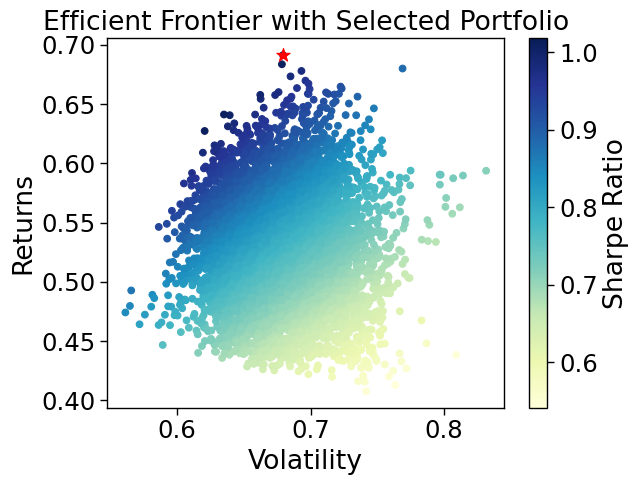

In [380]:
plt.scatter(results_frame.stdev, results_frame.ret, c=results_frame.sharpe, cmap='YlGnBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], color='red', marker='*', s=100)

# Red star for max Sharpe Ratio
plt.title('Efficient Frontier with Selected Portfolio')
plt.show()


In [381]:

# Define the Bitcoin ticker symbol
btc_ticker = "BTC-USD"

# Fetch historical data for Bitcoin
btc_data = yf.download(btc_ticker, period="1mo")  # Adjust the period as needed

# Extract the 'Close' column
btc_close_prices = btc_data['Close']

# Display the closing prices
print(btc_close_prices)


[*********************100%%**********************]  1 of 1 completed

Date
2024-02-29    61198.382812
2024-03-01    62440.632812
2024-03-02    62029.847656
2024-03-03    63167.371094
2024-03-04    68330.414062
2024-03-05    63801.199219
2024-03-06    66106.804688
2024-03-07    66925.484375
2024-03-08    68300.093750
2024-03-09    68498.882812
2024-03-10    69019.789062
2024-03-11    72123.906250
2024-03-12    71481.289062
2024-03-13    73083.500000
2024-03-14    71396.593750
2024-03-15    69403.773438
2024-03-16    65315.117188
2024-03-17    68390.625000
2024-03-18    67548.593750
2024-03-19    61912.773438
2024-03-20    67913.671875
2024-03-21    65491.390625
2024-03-22    63778.761719
2024-03-23    64062.203125
2024-03-24    67234.171875
2024-03-25    69958.812500
2024-03-26    69987.835938
2024-03-27    69455.343750
2024-03-28    70744.953125
2024-03-29    69892.828125
2024-03-31    70441.539062
Name: Close, dtype: float64


In [382]:
latest_close_price = btc_close_prices[-1]
print(f"Latest closing price for Bitcoin: {latest_close_price}")


Latest closing price for Bitcoin: 70441.5390625


C:\Users\nency\AppData\Local\Temp\ipykernel_16060\3948471972.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



[*********************100%%**********************]  1 of 1 completed


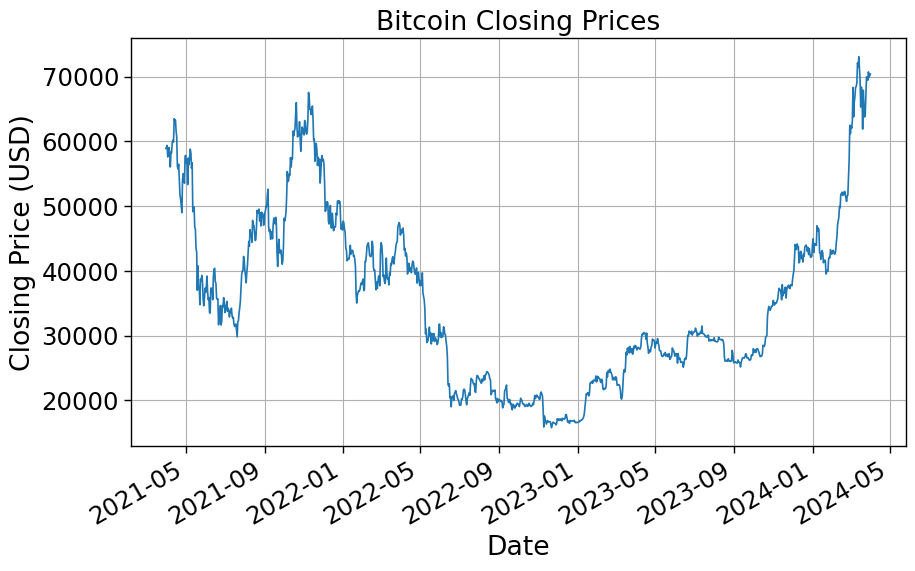

In [383]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the Bitcoin ticker symbol
btc_ticker = "BTC-USD"

# Fetch historical data for Bitcoin
btc_data = yf.download(btc_ticker, period="3y")  # Adjust the period as needed

# Extract the 'Close' column
btc_close_prices = btc_data['Close']

# Plotting the closing prices
plt.figure(figsize=(10, 6))
btc_close_prices.plot()
plt.title('Bitcoin Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


In [385]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB 8.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/13.3 MB 13.7 MB/s eta 0:00:01
   ----- ---------------------------------- 1.8/13.3 MB 14.7 MB/s eta 0:00:01
   --------- ------------------------------ 3.2/13.3 MB 18.5 MB/s eta 0:00:01
   ------------- -------------------------- 4.4/13.3 MB 20.2 MB/s eta 0:00:01
   ---------------- ----------------------- 5.5/13.3 MB 20.6 MB/s eta 0:00:01
   ------------------- -------------------- 6.6/13.3 MB 21.2 MB/s eta 0:00:01
   ----------------------- ---------------- 8.0/13.3 MB 22.1 MB/s eta 0:00:01
   --------------------------- ------------ 9.1/13.3 MB 22.4 MB/s eta 0:00:01
   ------------------------------- -------- 10.5/13.3 MB 24.2 MB/s eta 0:00:01
   --------------------------------- ------ 11.1/13.3 MB 24.2 MB/s eta 0:00:01
   ------------------------------------- -- 12.4/13.3 MB 24.2 MB/s eta 


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%%**********************]  1 of 1 completed
DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None


DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\nency\AppData\Local\Temp\tmpqoukz5q5\key69p3u.json
DEBUG:cmdstanpy:input tempfile: C:\Users\nency\AppData\Local\Temp\tmpqoukz5q5\cicf5hqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\nency\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=52800', 'data', 'file=C:\\Users\\nency\\AppData\\Local\\Temp\\tmpqoukz5q5\\key69p3u.json', 'init=C:\\Users\\nency\\AppData\\Local\\Temp\\tmpqoukz5q5\\cicf5hqv.json', 'output', 'file=C:\\Users\\nency\\AppData\\Local\\Temp\\tmpqoukz5q5\\prophet_model86948xaw\\prophet_model-20240331005708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1]

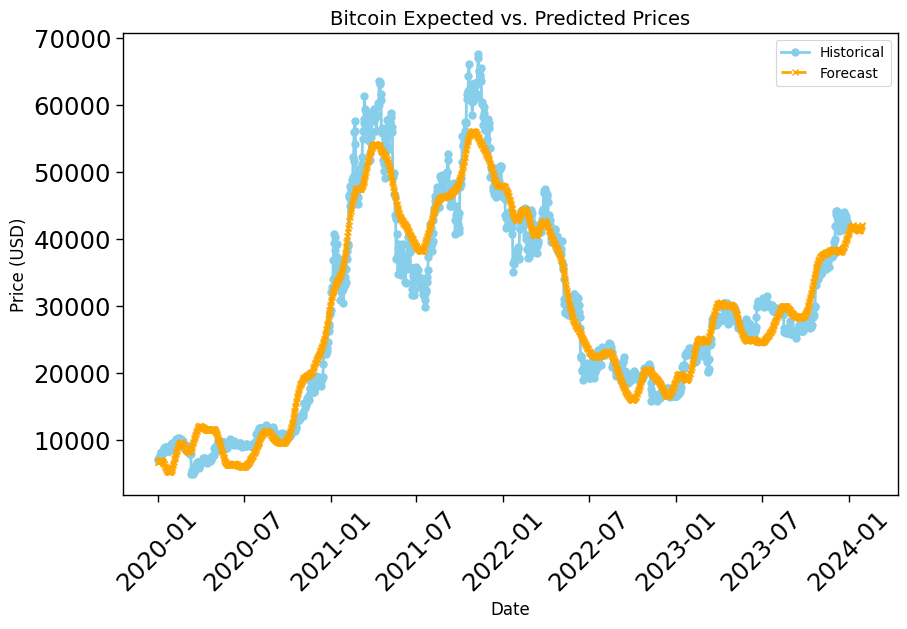

In [391]:
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# Fetch historical Bitcoin data
btc_data = yf.download('BTC-USD', start='2020-01-01', end='2024-01-01')

# Prepare the dataframe
df = btc_data.reset_index()[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the model
model = Prophet(daily_seasonality=True)
model.fit(df)

# Create a dataframe to hold predictions
future = model.make_future_dataframe(periods=30)  # Predicting the next 30 days
forecast = model.predict(future)

# # Plot the historical and forecasted data
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(df['ds'], df['y'], label='Historical')
# ax.plot(forecast['ds'], forecast['yhat'], label='Forecast')
# ax.set_title('Bitcoin Expected vs. Predicted Prices')
# ax.set_xlabel('Date')
# ax.set_ylabel('Price (USD)')
# ax.legend()
# plt.show()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['ds'], df['y'], label='Historical', color='skyblue', linewidth=2, marker='o', markersize=5)
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange', linestyle='--', linewidth=2, marker='x', markersize=5)
ax.set_title('Bitcoin Expected vs. Predicted Prices', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price (USD)', fontsize=12)
ax.legend(fontsize=10)
plt.xticks(rotation=45)
plt.show()


